In [1]:
pip install --upgrade pandas seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.9 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
df.shape

(1025, 14)

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(302, 14)

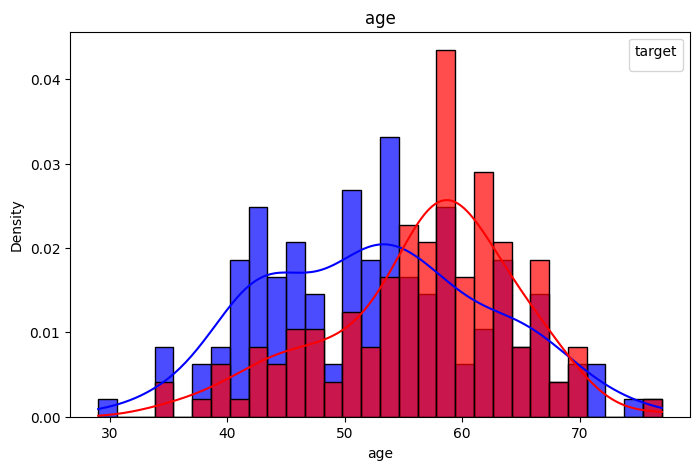

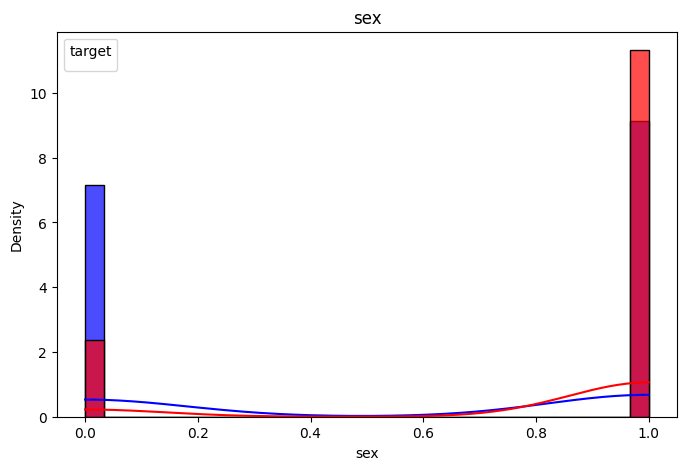

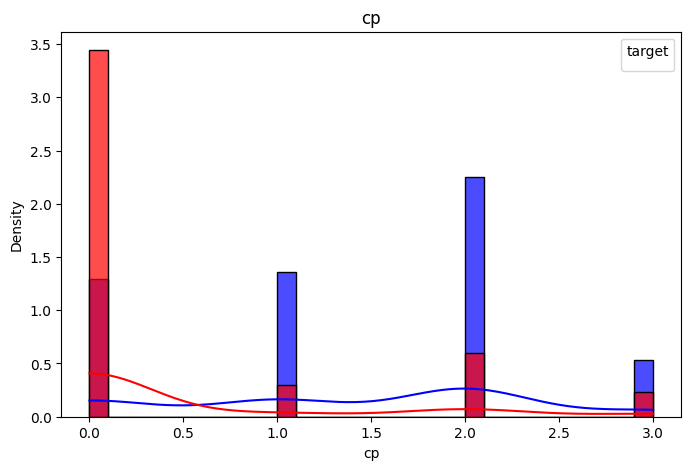

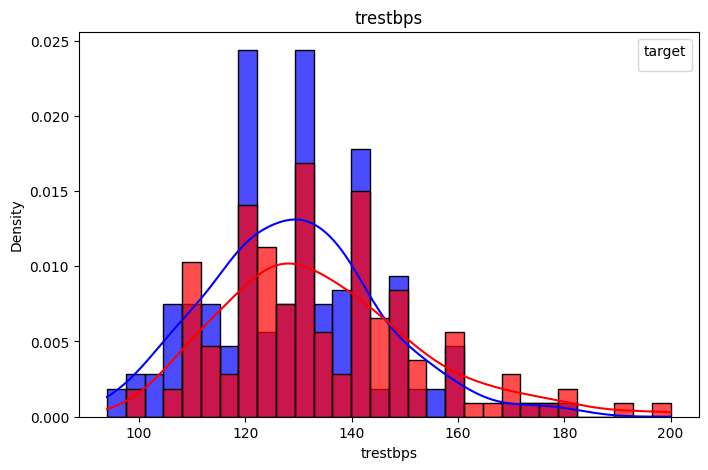

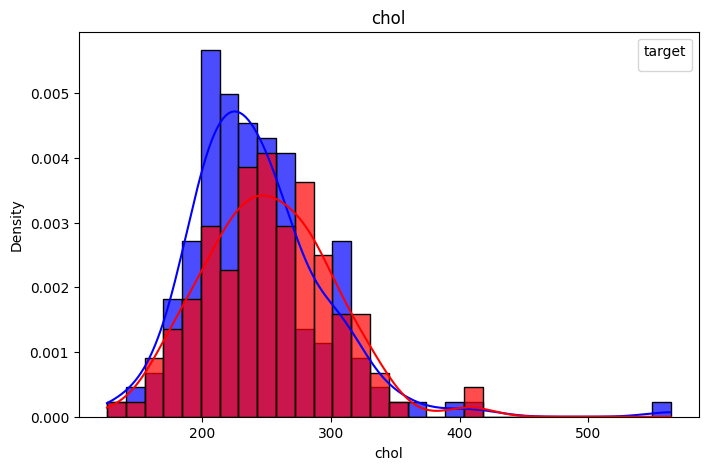

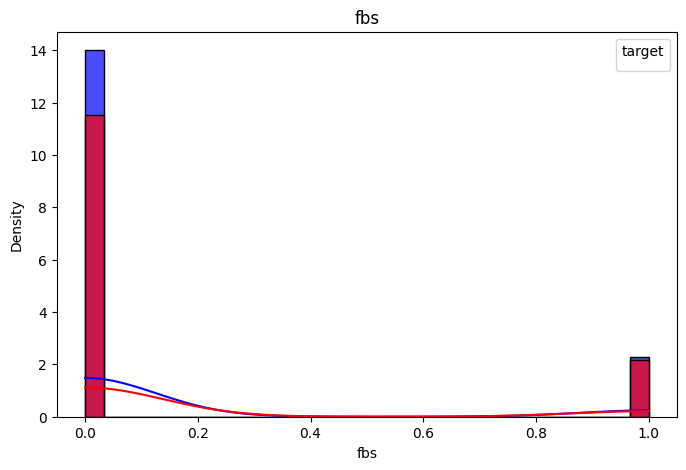

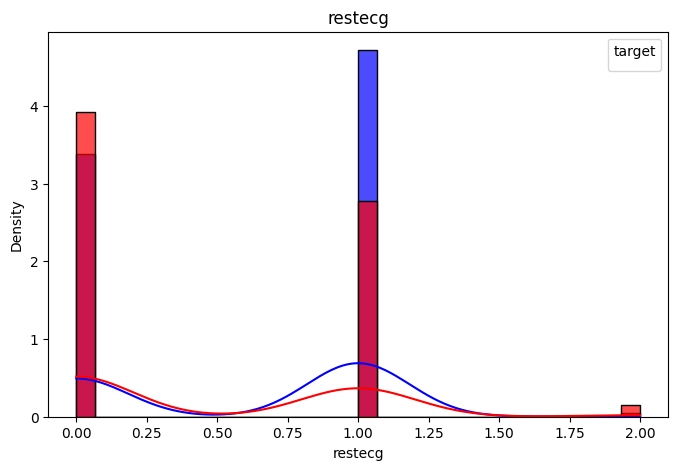

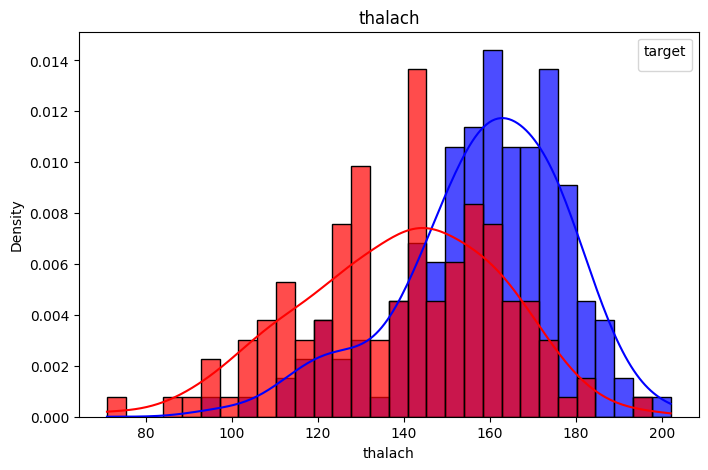

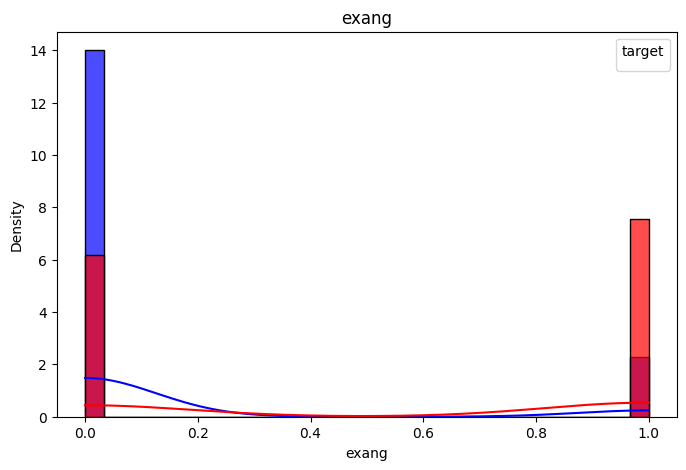

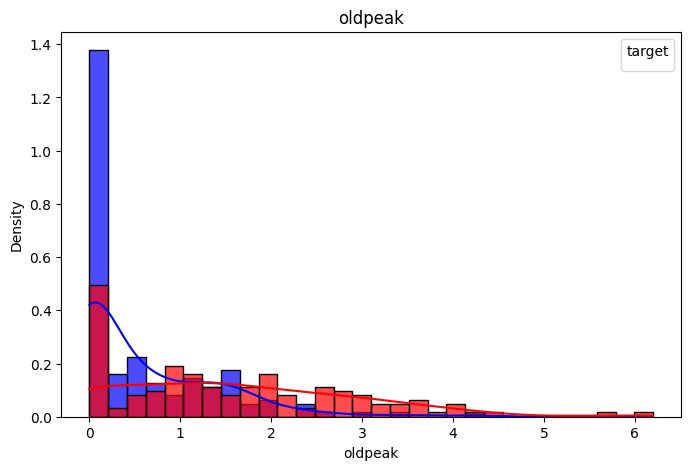

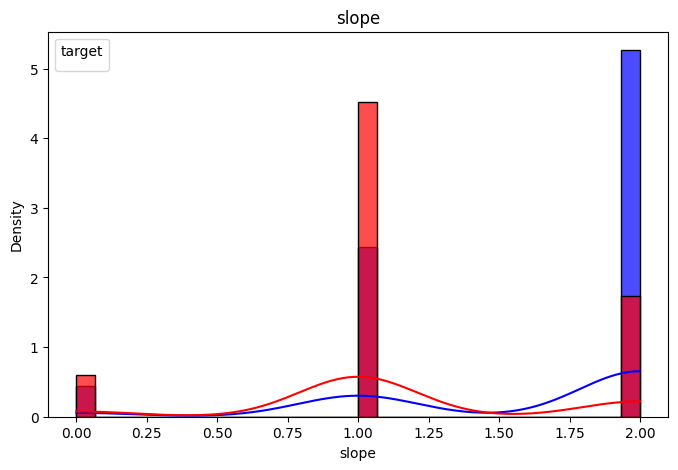

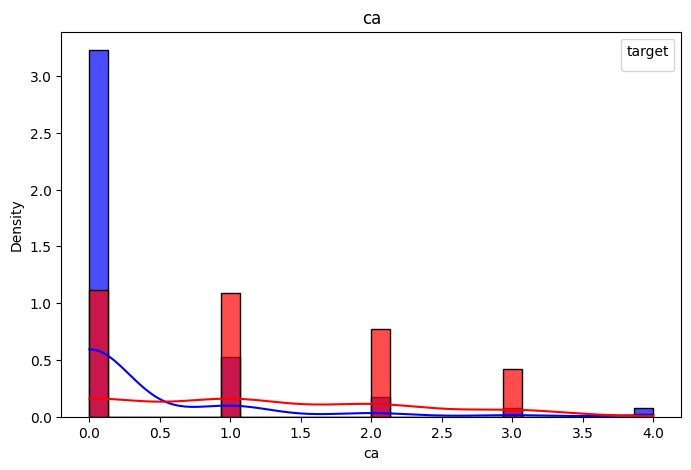

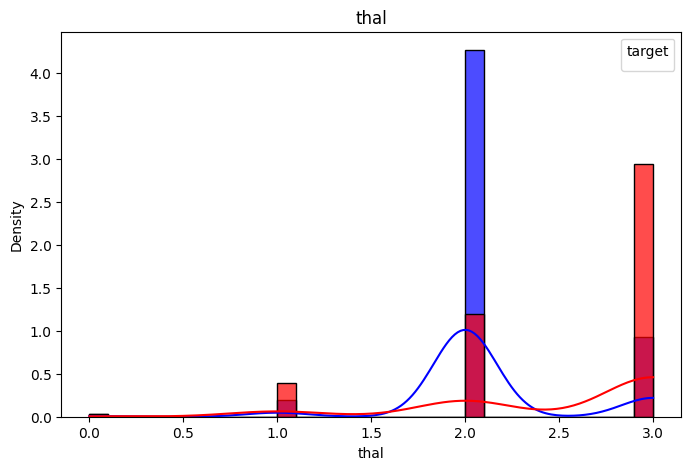

In [8]:
#In matplotlib
# for label in df.columns[:-1]:
#     plt.hist(df[df['target'] == 1][label], color='blue', label=1, alpha=0.7, density=True)
#     plt.hist(df[df['target'] == 0][label], color='red', label=0, alpha=0.7, density=True)
#     plt.title(label)
#     plt.legend()
#     plt.show()

#In seaborn
for label in df.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=label, hue='target', bins=30, alpha=0.7, stat="density", kde=True, palette={0: 'red', 1: 'blue'})
    plt.title(label)
    plt.legend(title='target')
    plt.show()

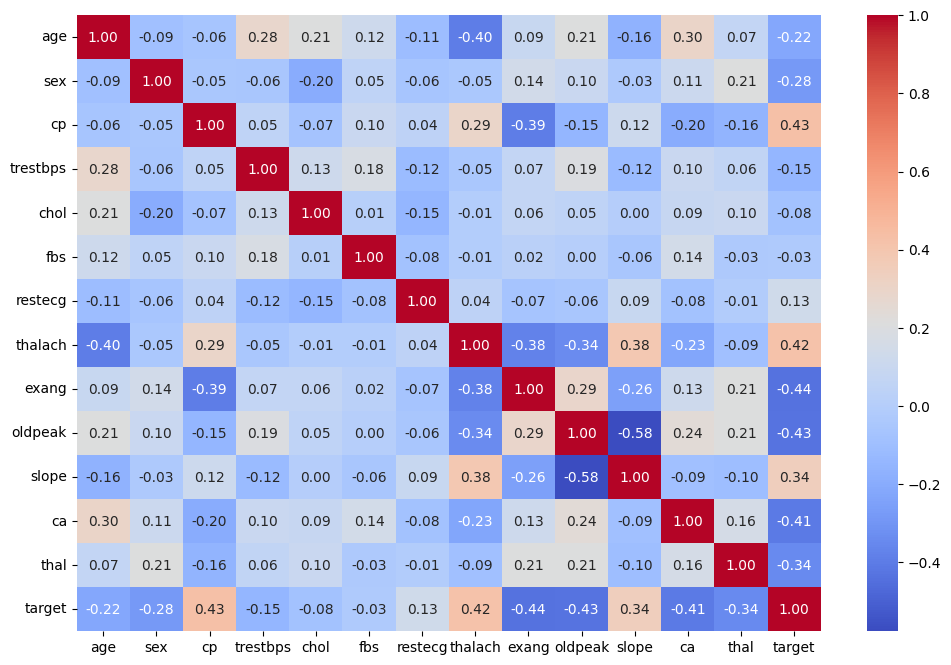

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [10]:
X = df.drop(columns=['target'])
y = df['target']

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_col_names = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_col_names = [col_name for col_name in X if col_name not in categorical_col_names]

encoder = LabelEncoder()
scaler = StandardScaler()

for col_name in categorical_col_names:
    X[col_name] = encoder.fit_transform(X[col_name])

X[numerical_col_names] = scaler.fit_transform(X[numerical_col_names])

X.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.267966    1   0 -0.376556 -0.667728    0        1  0.806035      0   
1 -0.157260    1   0  0.478910 -0.841918    1        0  0.237495      1   
2  1.724733    1   0  0.764066 -1.403197    0        1 -1.074521      1   
3  0.728383    1   0  0.935159 -0.841918    0        1  0.499898      0   
4  0.839089    0   0  0.364848  0.919336    1        1 -1.905464      0   

    oldpeak  slope  ca  thal  
0 -0.037124      2   2     3  
1  1.773958      0   0     3  
2  1.342748      0   0     3  
3 -0.899544      2   1     3  
4  0.739054      1   3     2

# MODEL EVALUATION

* knn
* naive bayes
* logistic regression
* svm
* neural network (using tensorflow and pytorch)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Machine learning models

In [13]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.74
Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.79
SVM Accuracy: 0.77


# Neural network with Tensorflow

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = Sequential([
        Dense(num_nodes, activation='relu', input_shape=(13,)),
        Dropout(dropout_prob),
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_prob),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

In [15]:
def plot_history(history):
    sns.set_style("whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Plot
    sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', ax=axes[0])
    sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', ax=axes[0])
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Binary Crossentropy Loss")
    axes[0].legend()

    # Accuracy Plot
    sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', ax=axes[1])
    sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', ax=axes[1])
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


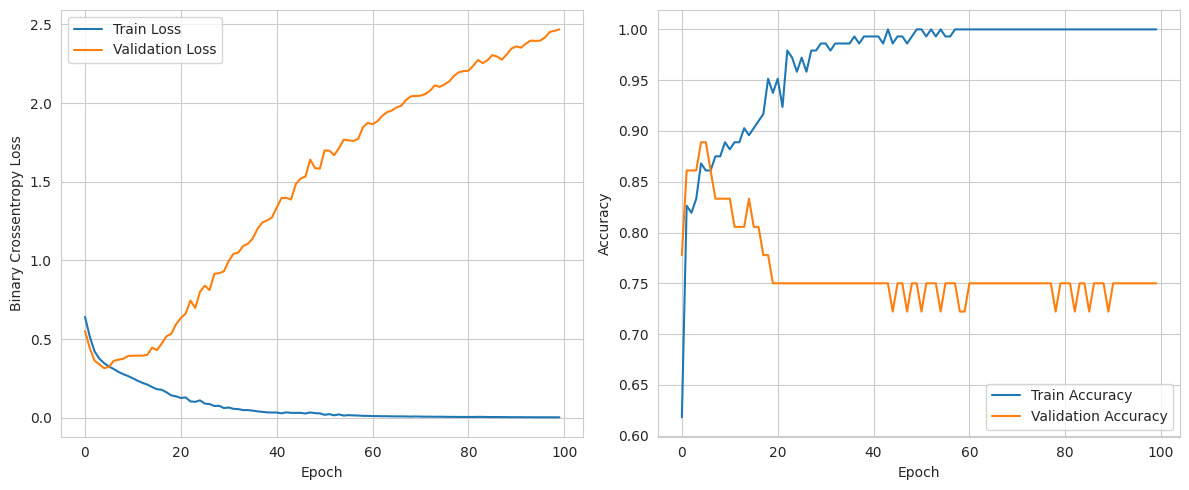

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7637 - loss: 2.7891
16 nodes, dropout 0, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


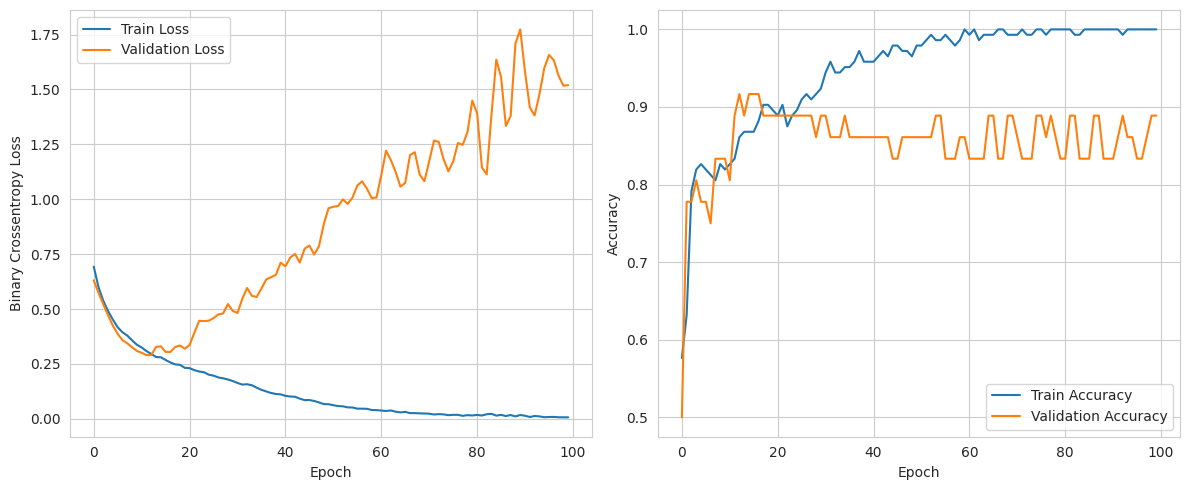

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8069 - loss: 2.9976
16 nodes, dropout 0, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


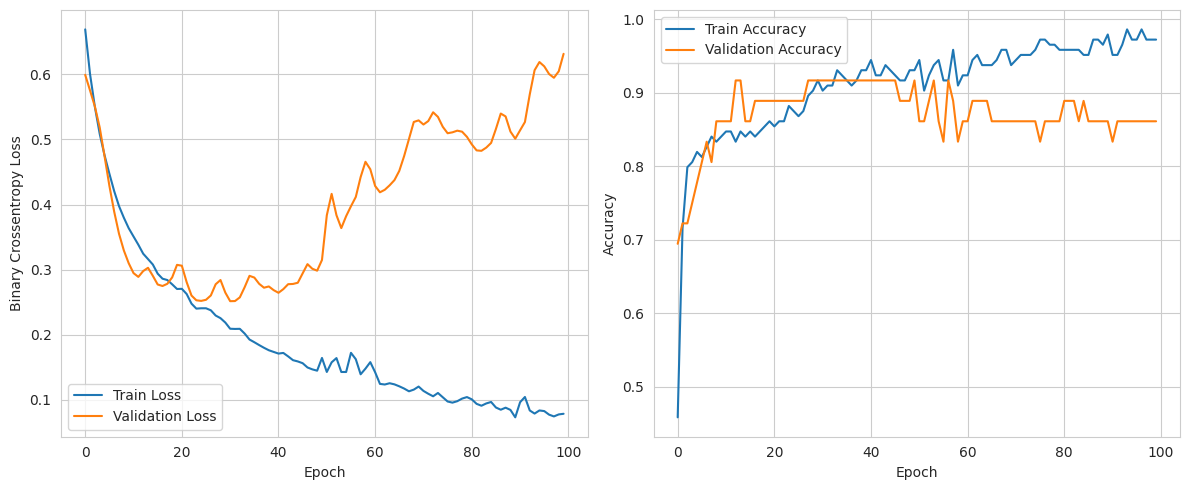

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7855 - loss: 1.2853
16 nodes, dropout 0, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


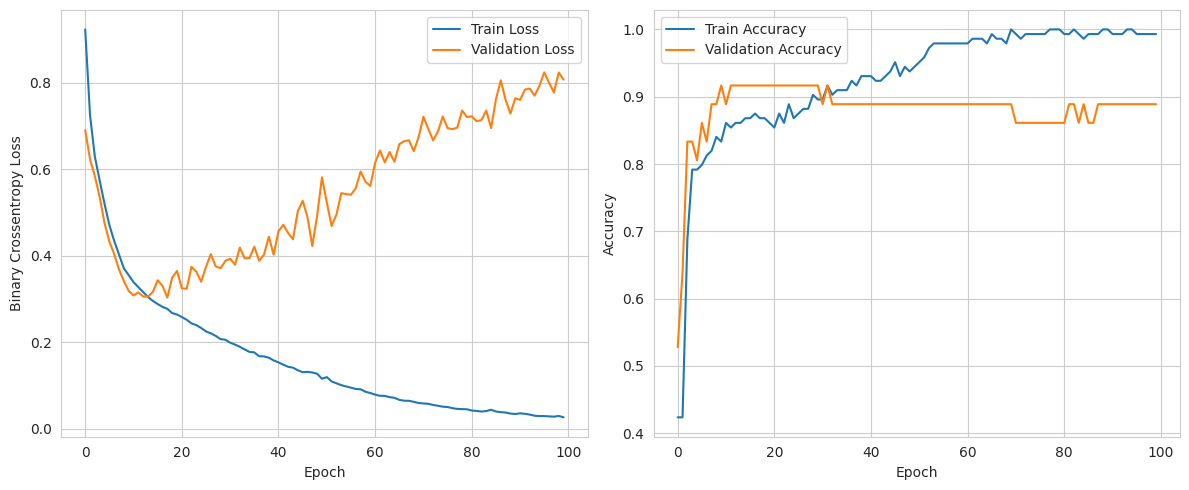

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7637 - loss: 2.1805
16 nodes, dropout 0, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


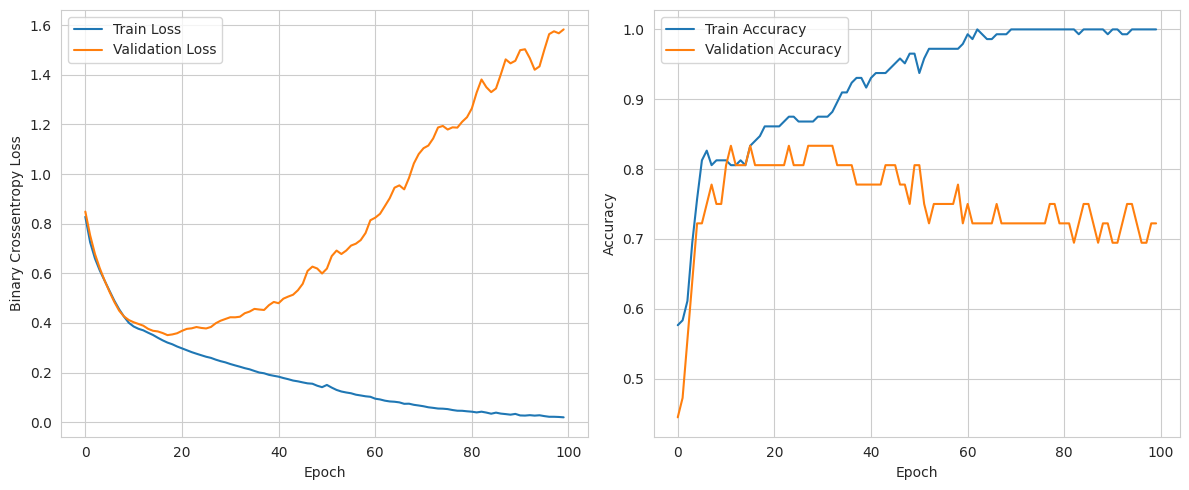

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7314 - loss: 1.8048
16 nodes, dropout 0, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


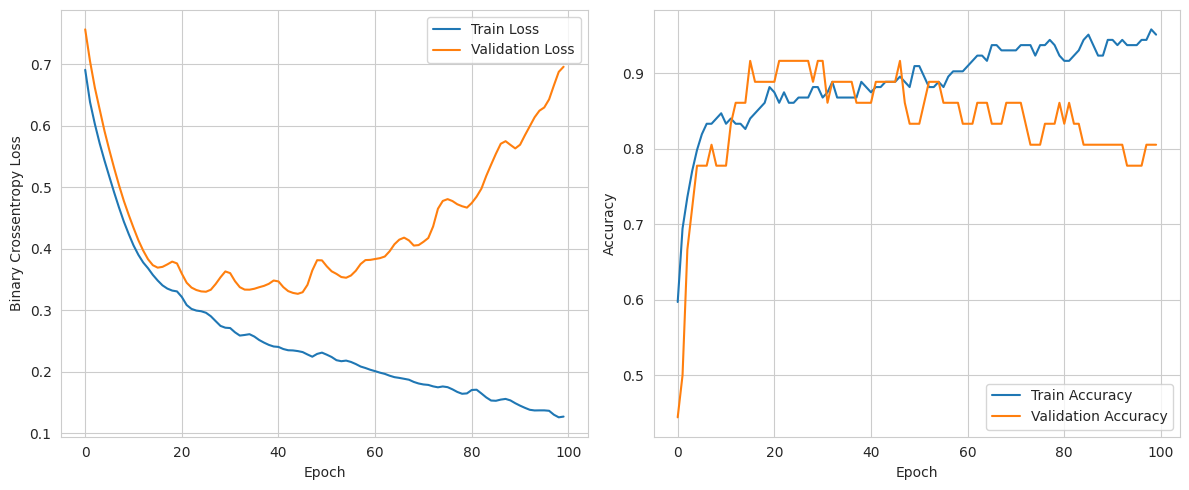

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7319 - loss: 1.2083
16 nodes, dropout 0, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


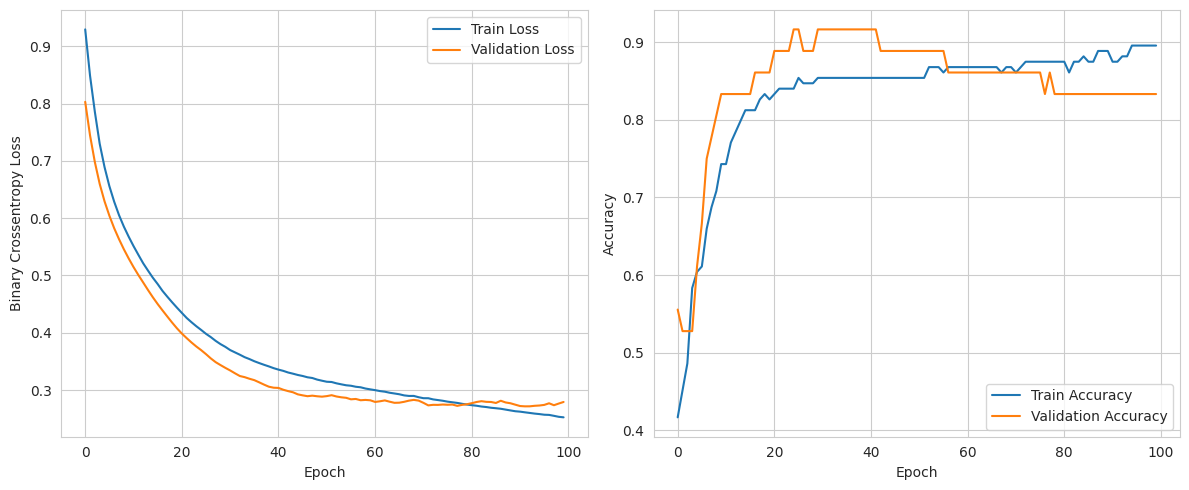

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8064 - loss: 0.4926
16 nodes, dropout 0, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


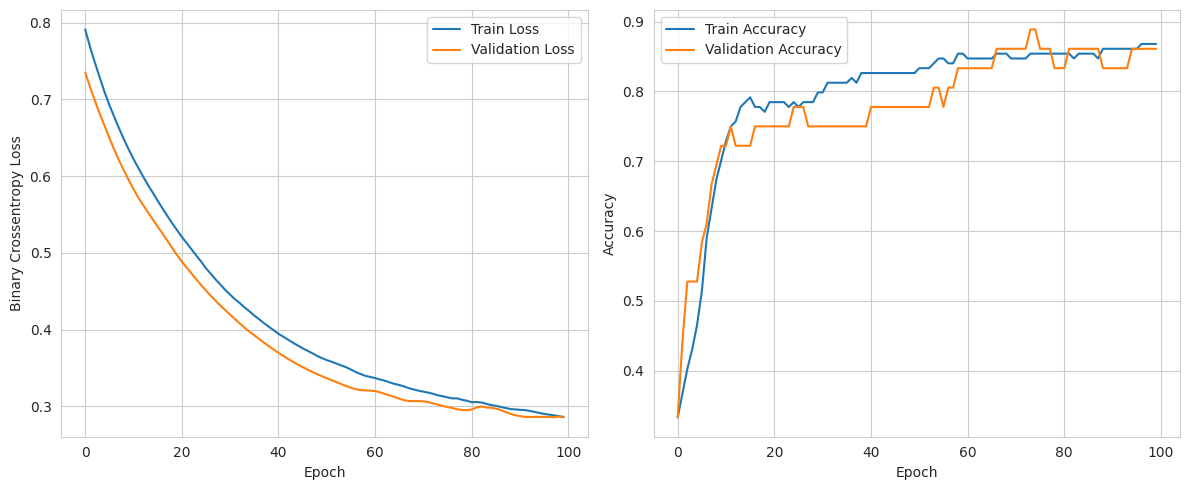

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8173 - loss: 0.4590
16 nodes, dropout 0, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


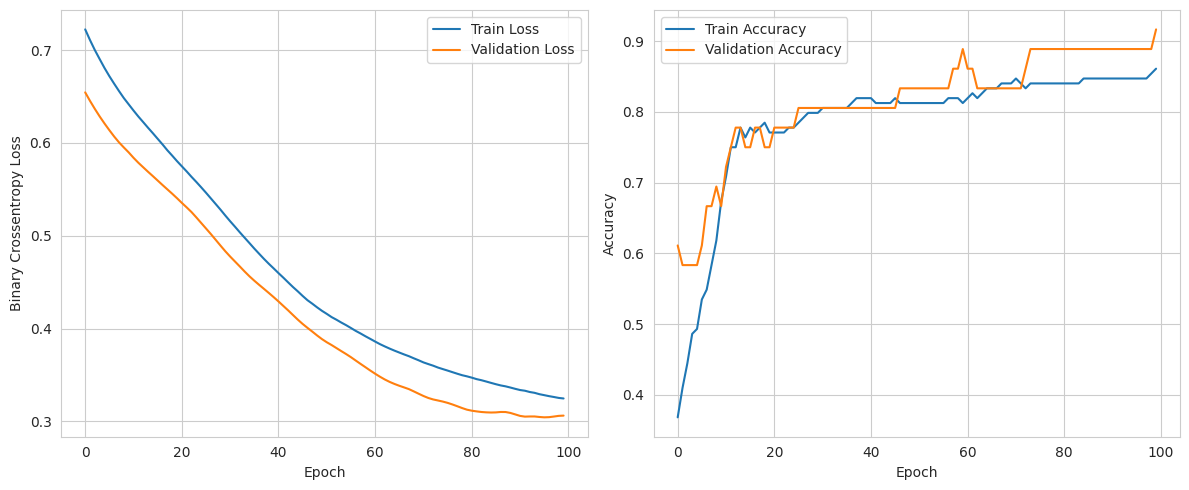

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7845 - loss: 0.4524
16 nodes, dropout 0.2, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


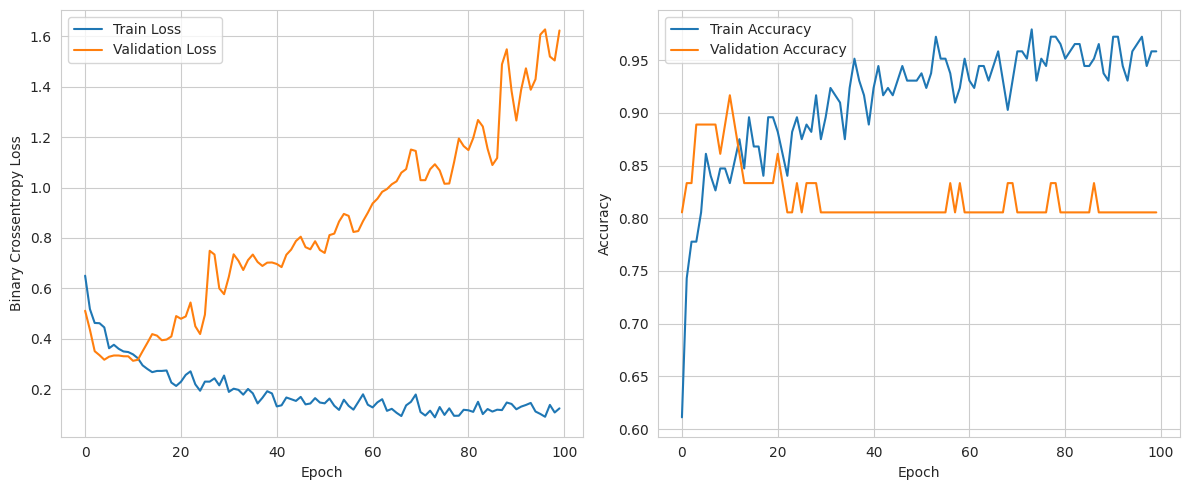

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7855 - loss: 2.0870
16 nodes, dropout 0.2, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


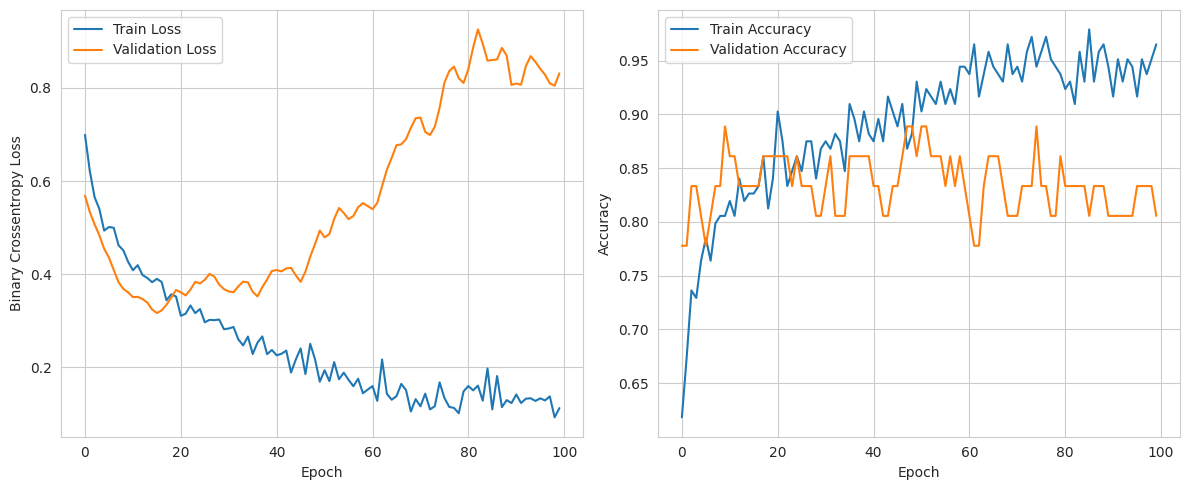

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7746 - loss: 1.9917
16 nodes, dropout 0.2, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


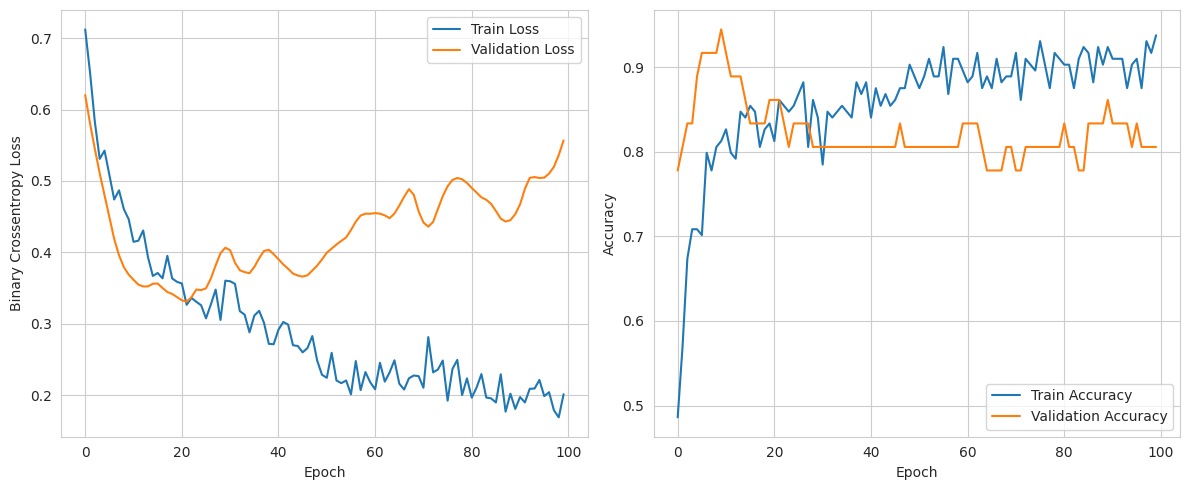

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7637 - loss: 0.9411
16 nodes, dropout 0.2, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


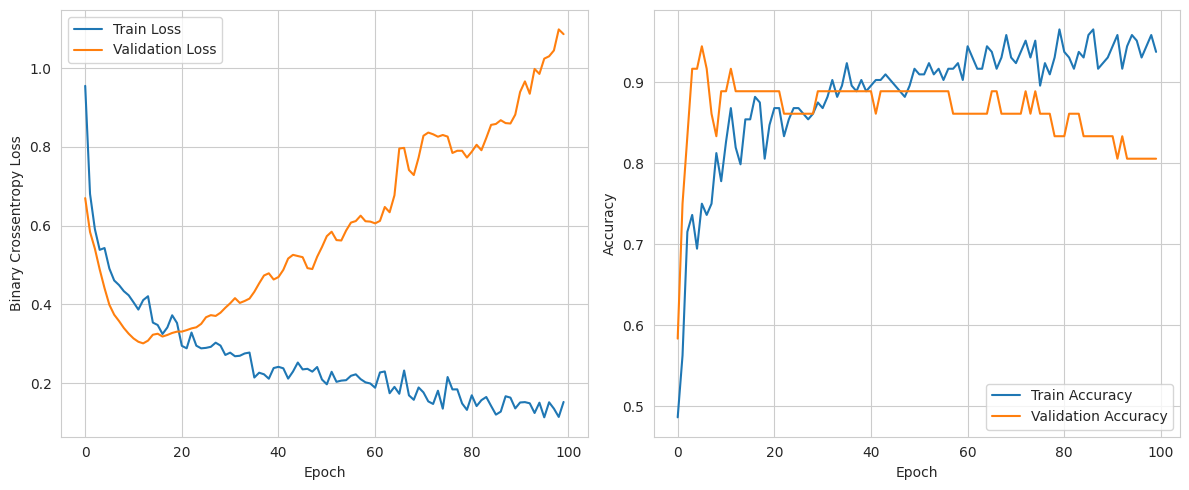

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7637 - loss: 1.5062
16 nodes, dropout 0.2, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


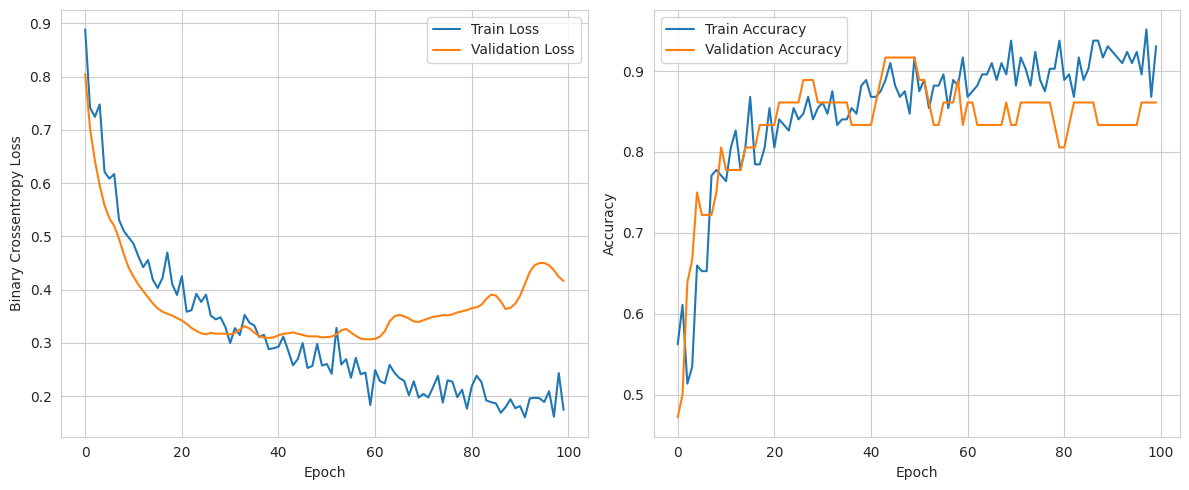

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8173 - loss: 0.9286
16 nodes, dropout 0.2, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


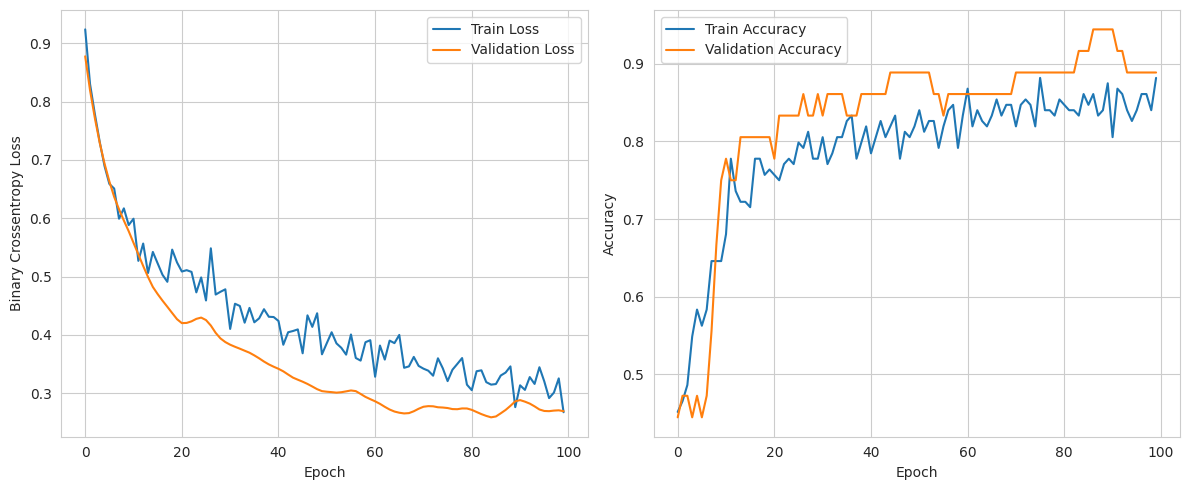

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7954 - loss: 0.5291
16 nodes, dropout 0.2, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


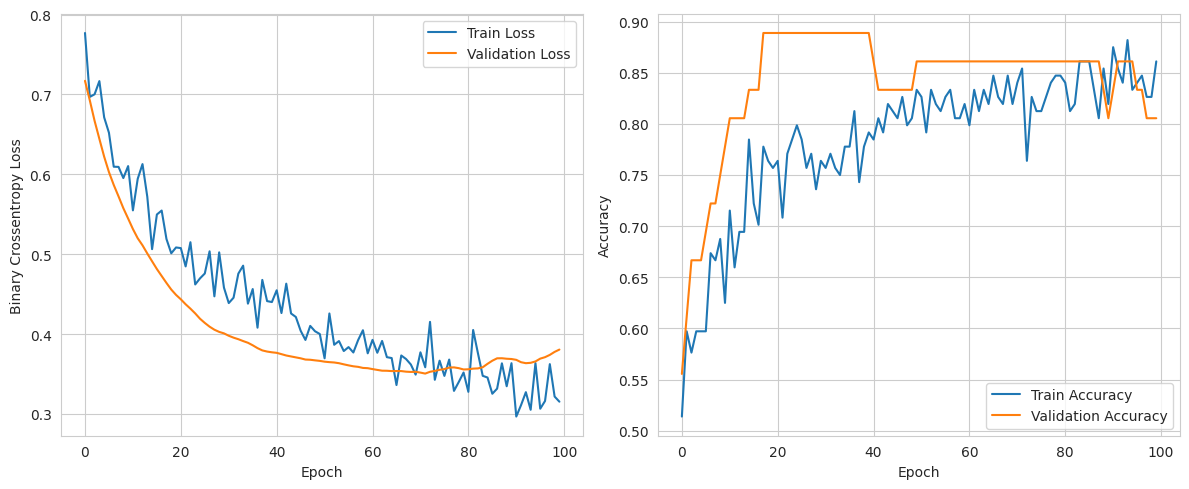

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8173 - loss: 0.4832
16 nodes, dropout 0.2, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


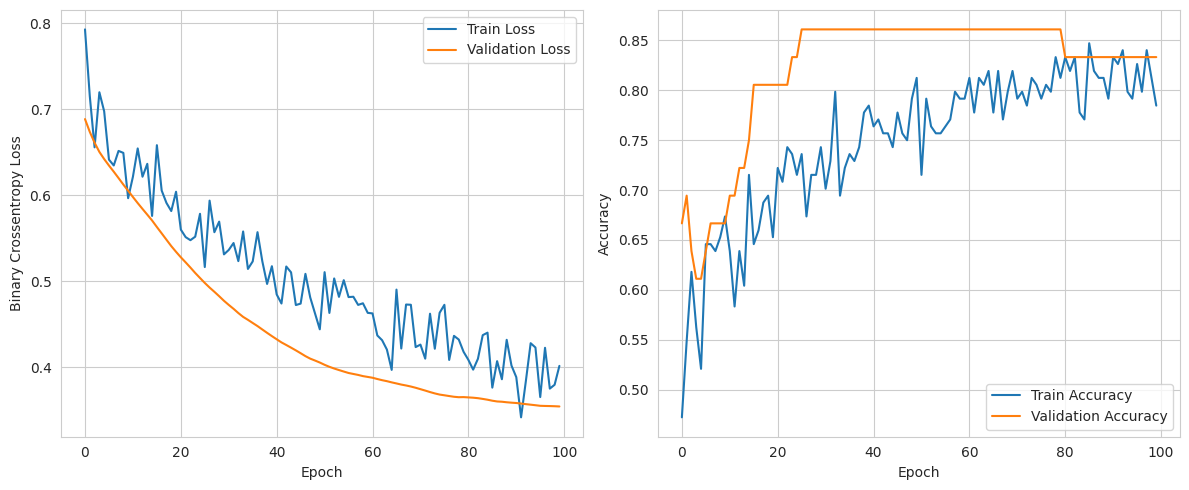

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8064 - loss: 0.4544
16 nodes, dropout 0.2, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


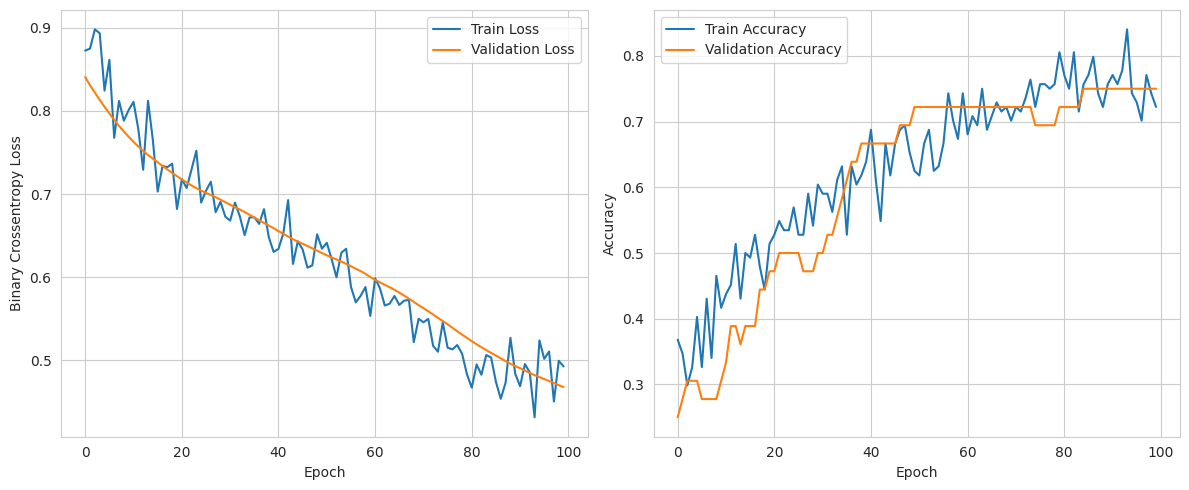

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7746 - loss: 0.4486
32 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


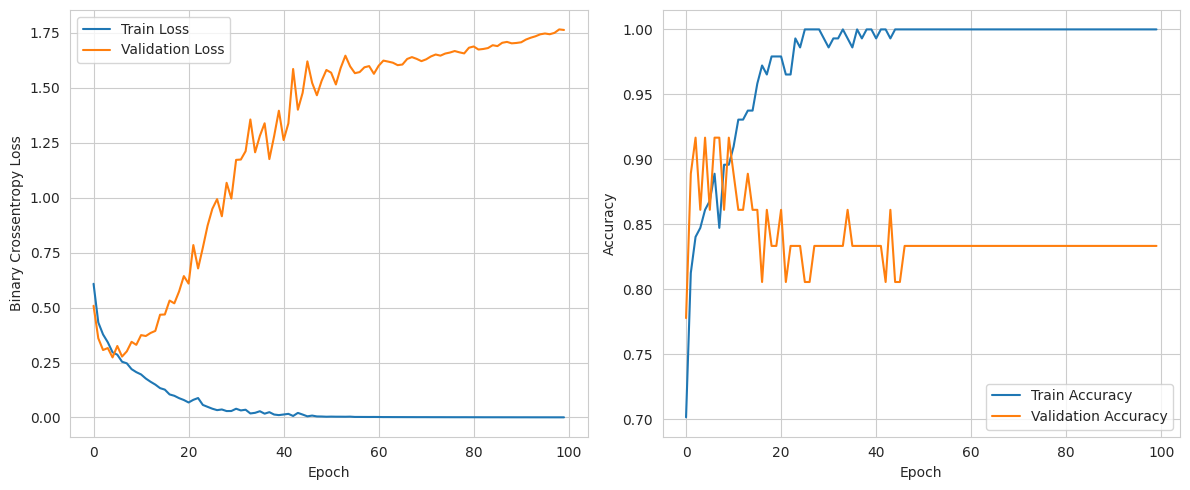

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7959 - loss: 2.7540
32 nodes, dropout 0, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


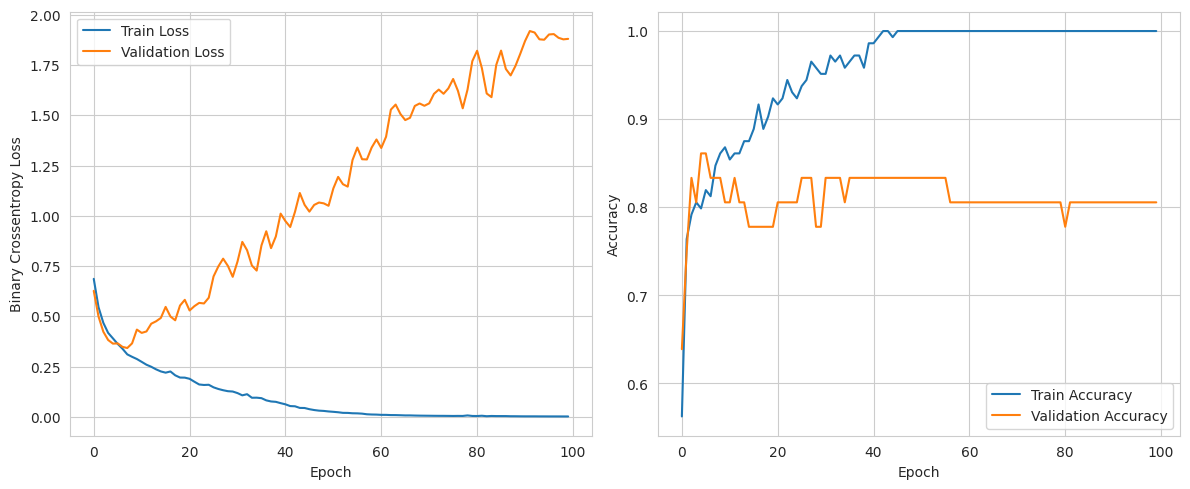

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7850 - loss: 2.8875
32 nodes, dropout 0, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


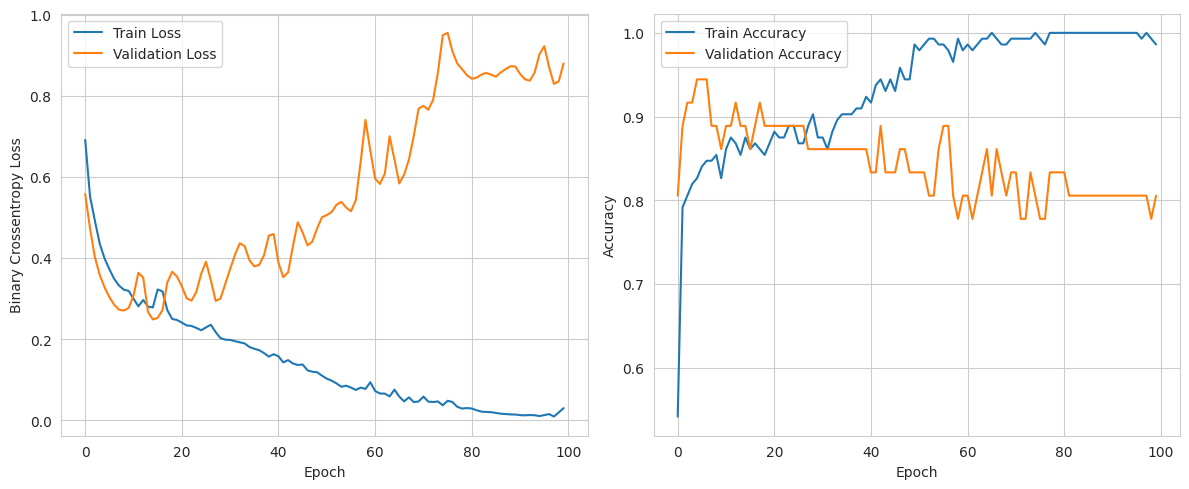

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7314 - loss: 2.2417
32 nodes, dropout 0, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


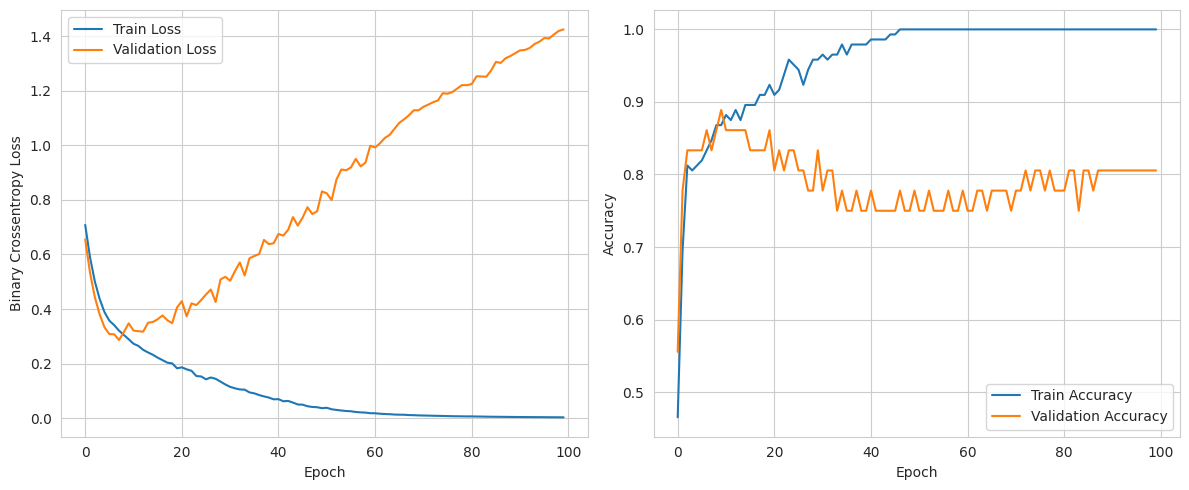

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7959 - loss: 2.4442
32 nodes, dropout 0, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


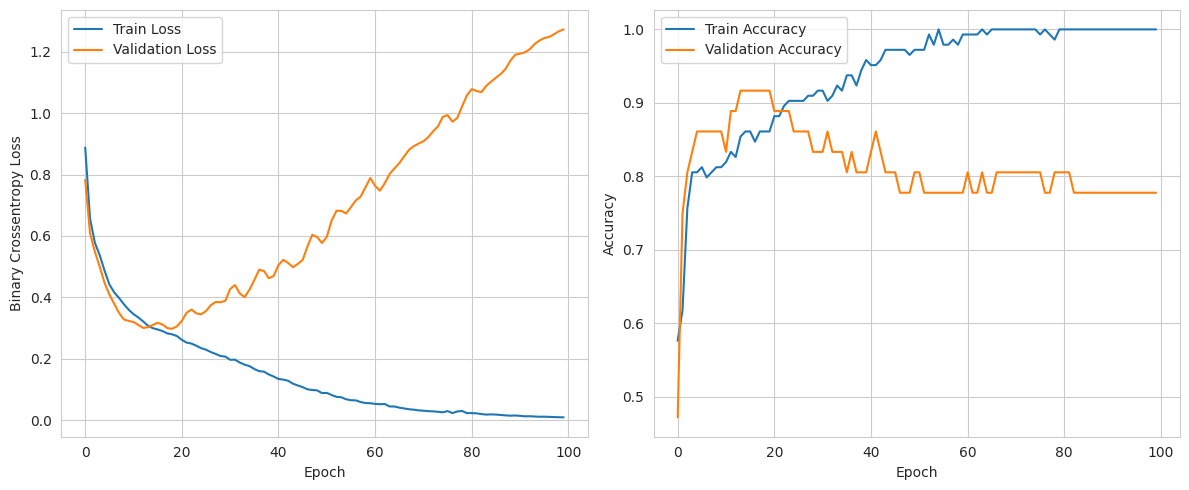

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7637 - loss: 2.3310
32 nodes, dropout 0, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


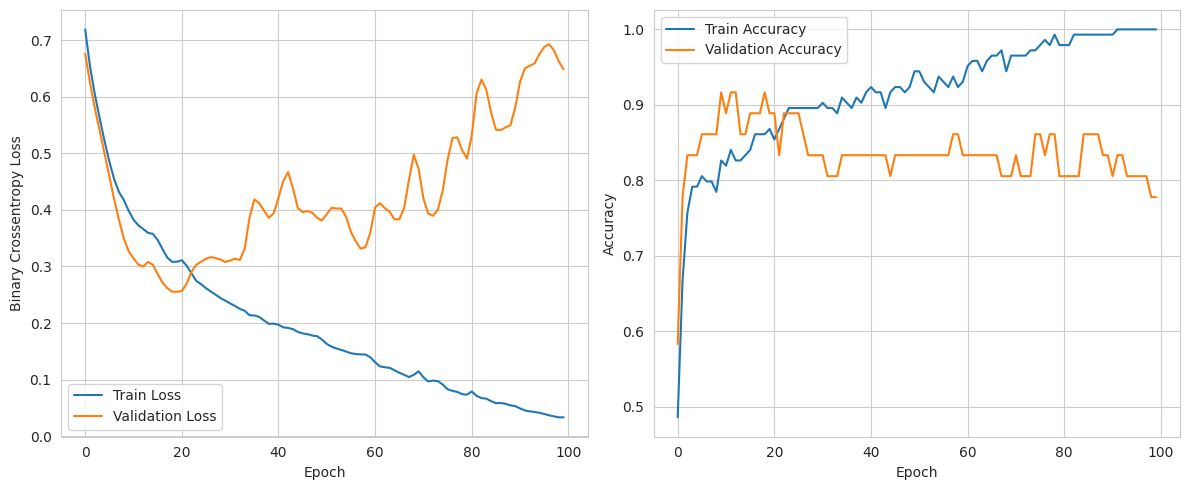

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6996 - loss: 1.6209
32 nodes, dropout 0, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


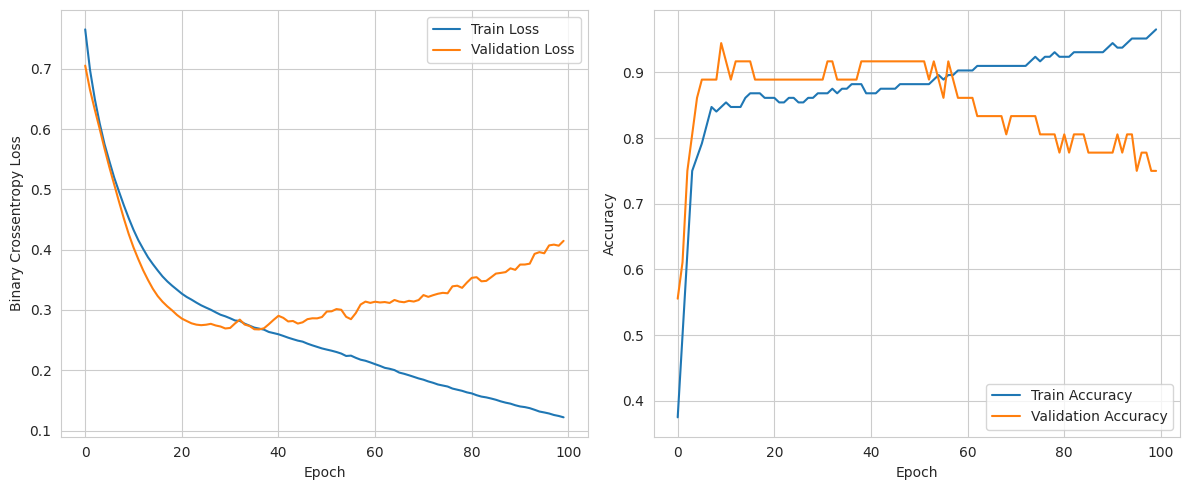

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6996 - loss: 1.0194
32 nodes, dropout 0, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


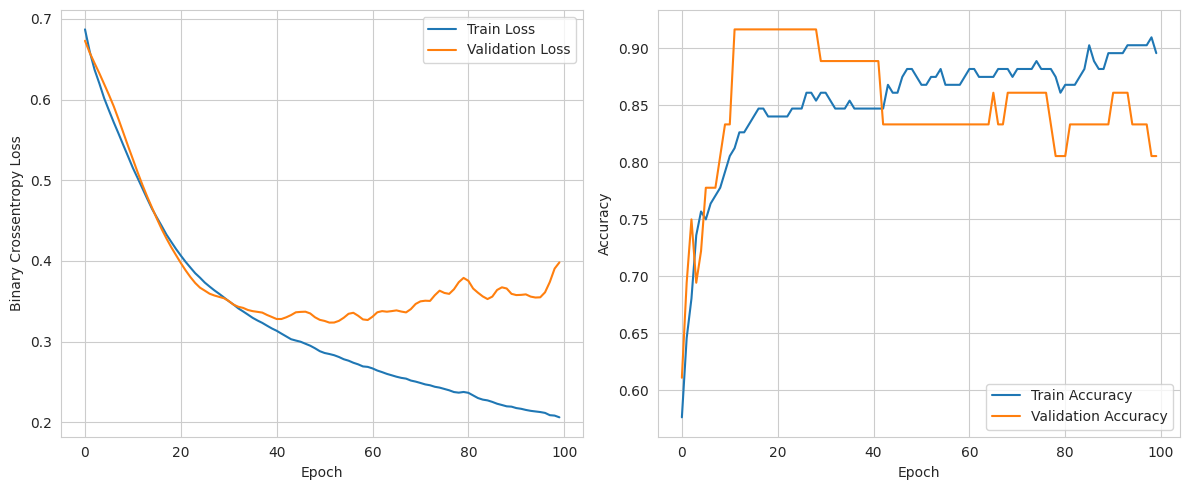

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7314 - loss: 0.7319
32 nodes, dropout 0, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


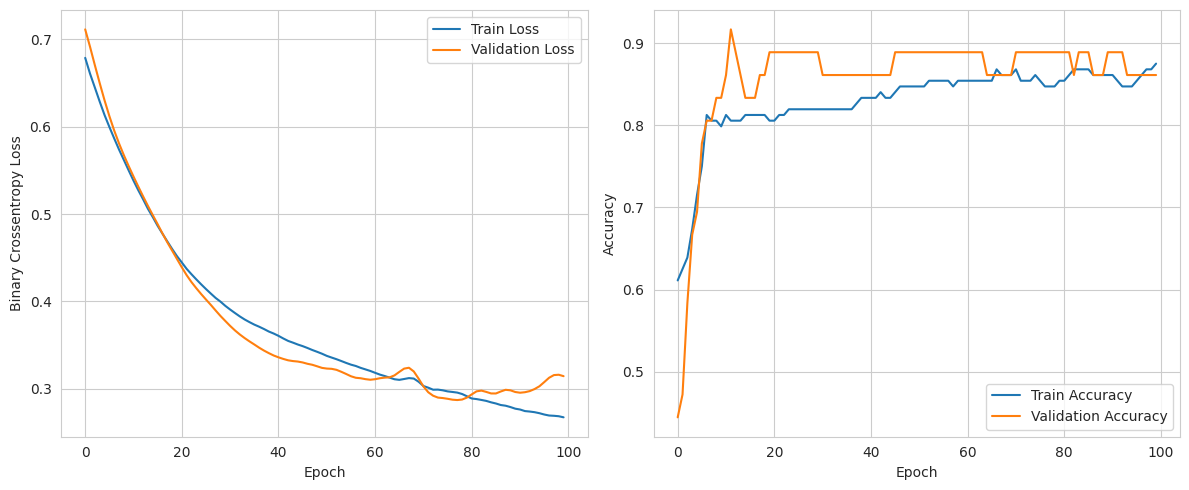

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7527 - loss: 0.4867
32 nodes, dropout 0.2, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


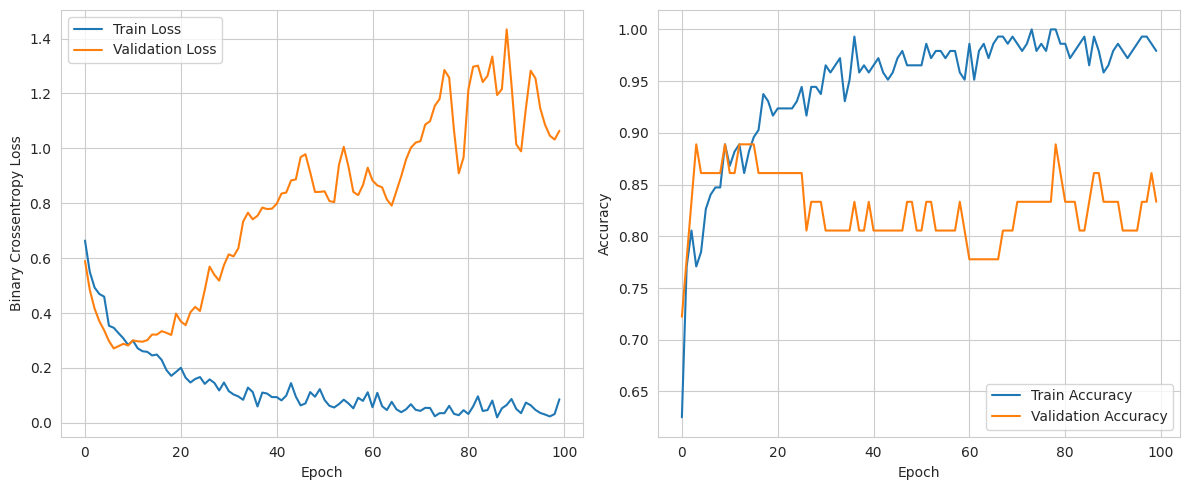

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7637 - loss: 2.4861
32 nodes, dropout 0.2, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


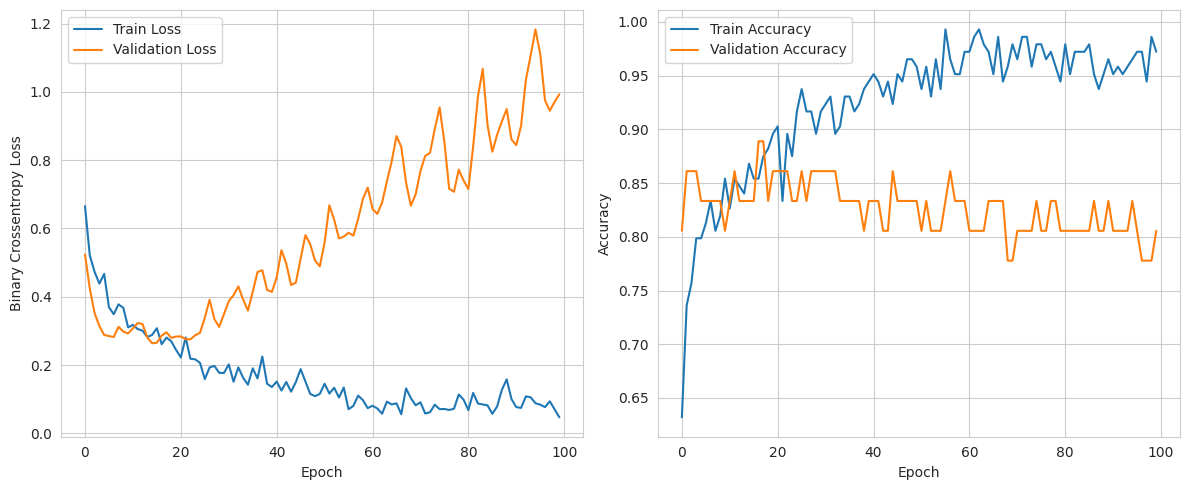

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7527 - loss: 2.1785
32 nodes, dropout 0.2, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


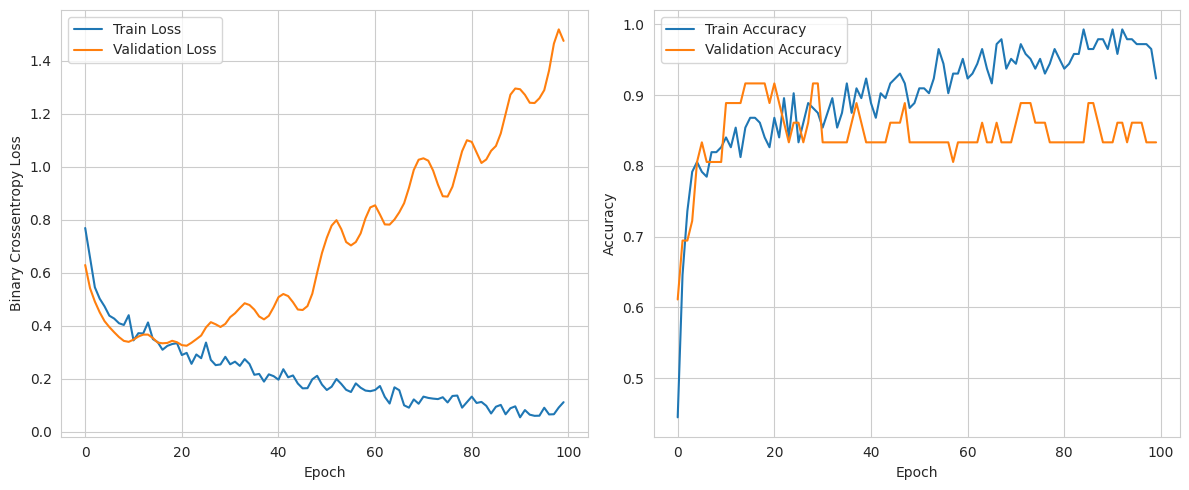

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7746 - loss: 2.0538
32 nodes, dropout 0.2, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


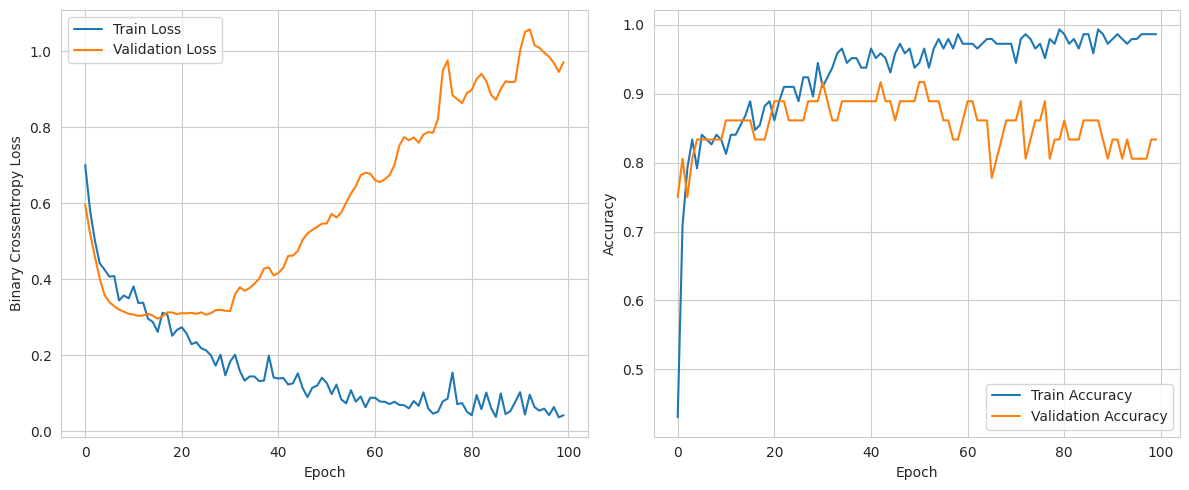

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7423 - loss: 2.2979
32 nodes, dropout 0.2, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


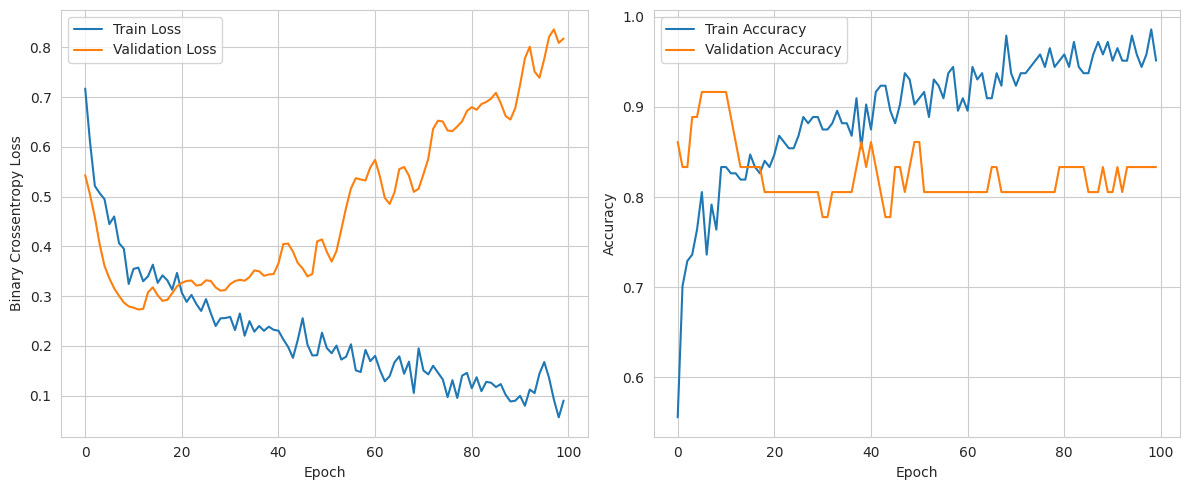

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7637 - loss: 1.6954
32 nodes, dropout 0.2, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


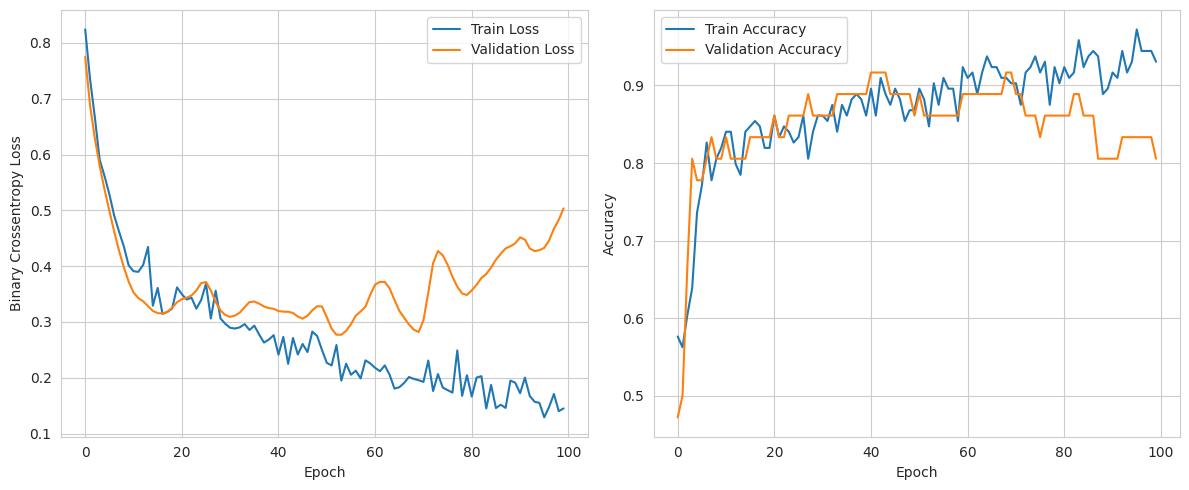

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7855 - loss: 0.8565
32 nodes, dropout 0.2, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


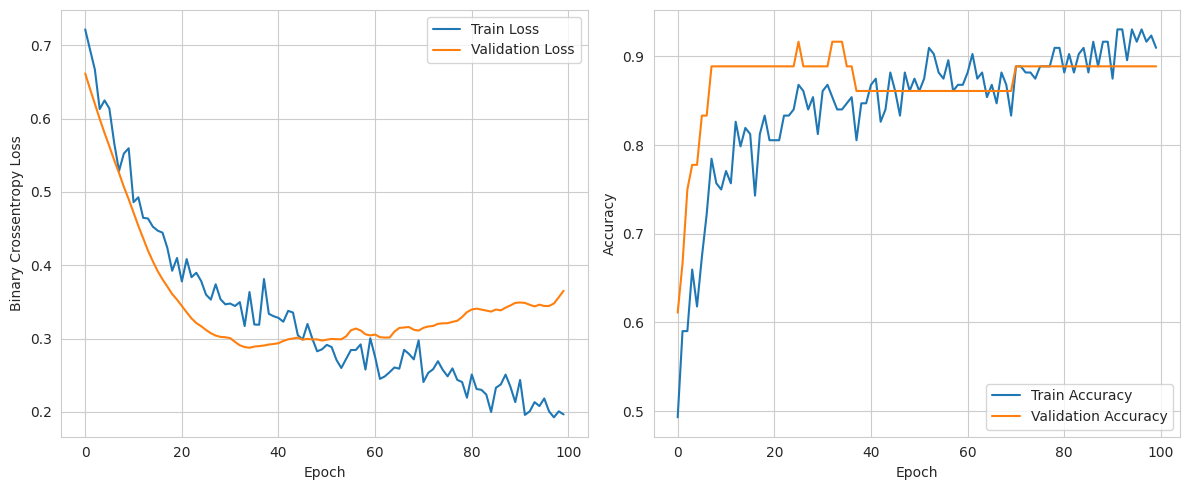

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7637 - loss: 0.7289
32 nodes, dropout 0.2, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


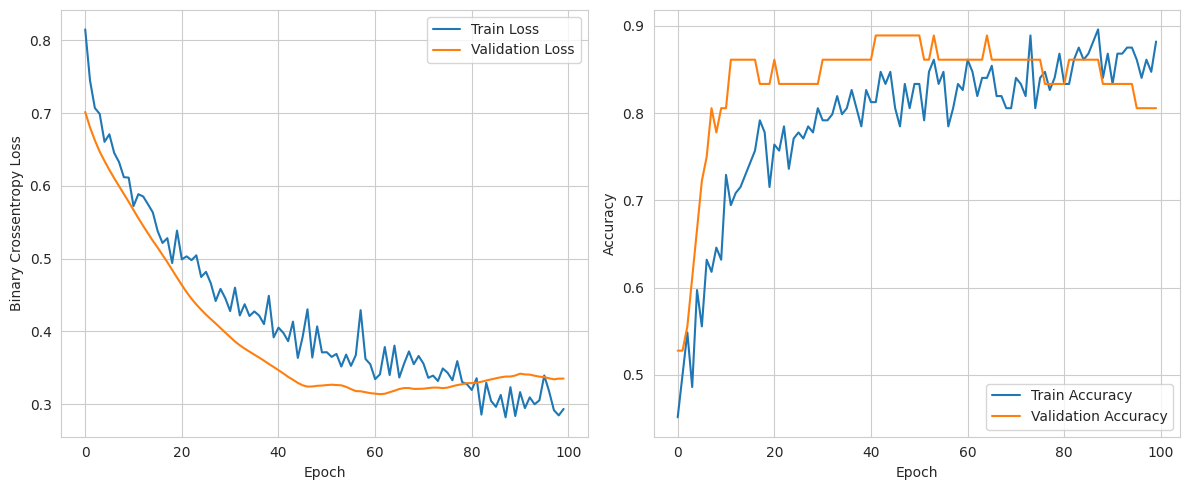

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8064 - loss: 0.5175
32 nodes, dropout 0.2, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


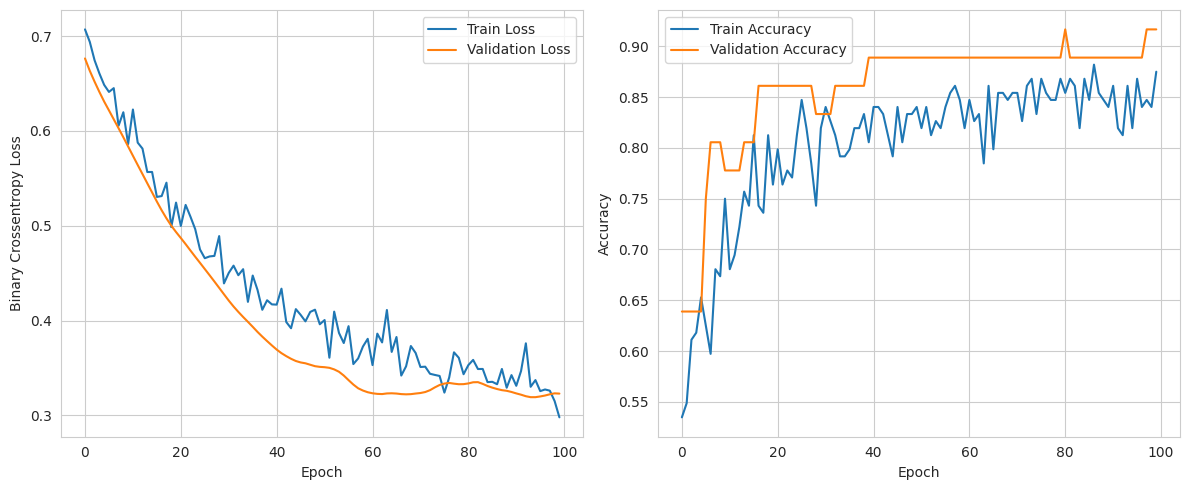

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7954 - loss: 0.4971
64 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


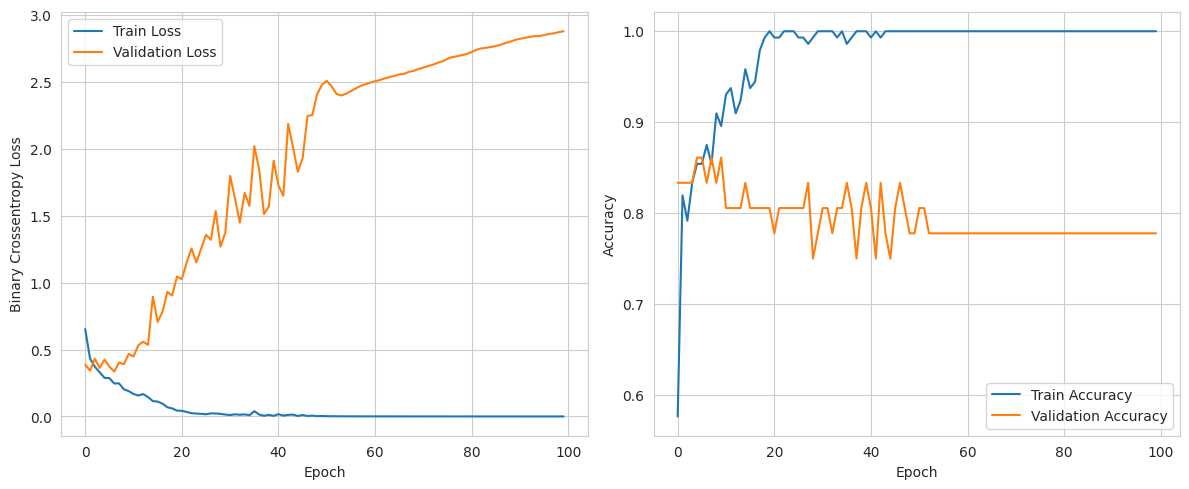

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.7637 - loss: 4.1595
64 nodes, dropout 0, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


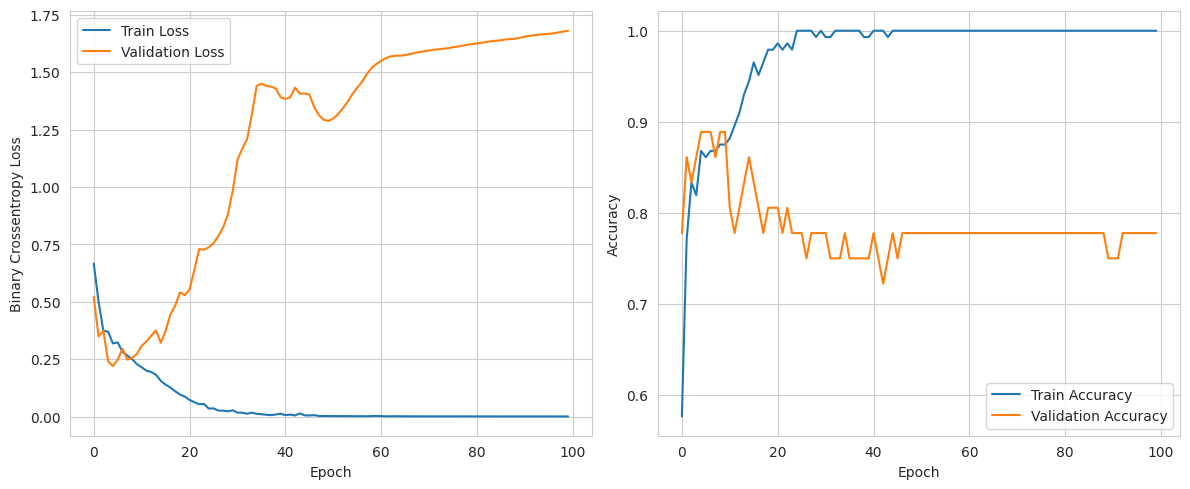

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7855 - loss: 3.4051
64 nodes, dropout 0, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


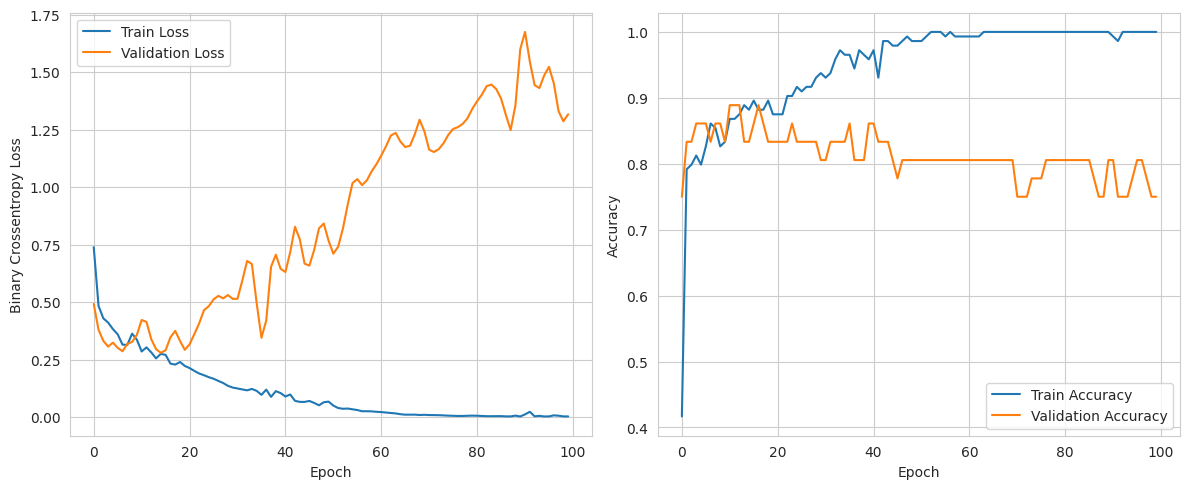

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8069 - loss: 2.7878
64 nodes, dropout 0, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


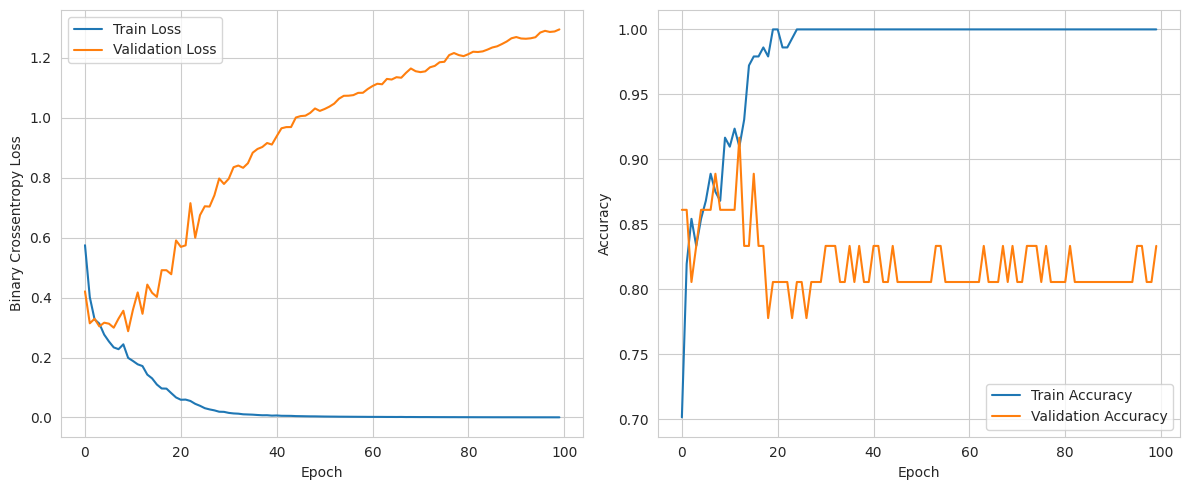

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7746 - loss: 2.7717
64 nodes, dropout 0, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


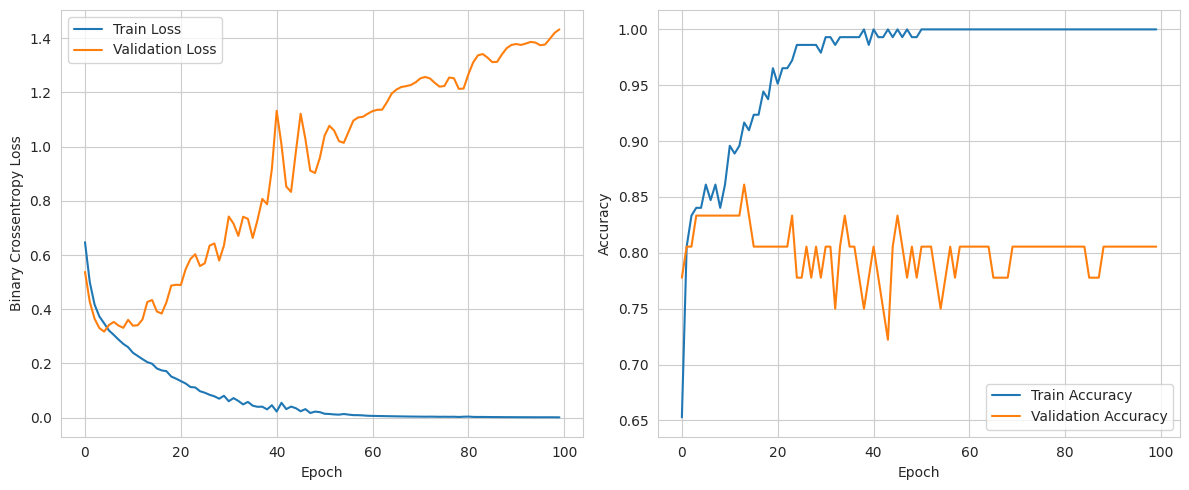

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7746 - loss: 2.8731
64 nodes, dropout 0, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


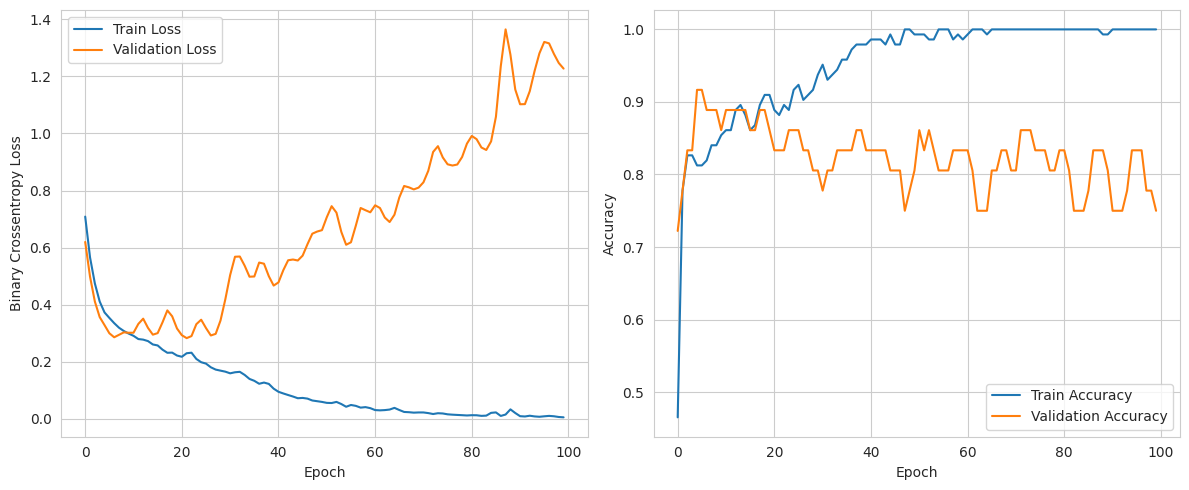

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7319 - loss: 2.2141
64 nodes, dropout 0, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


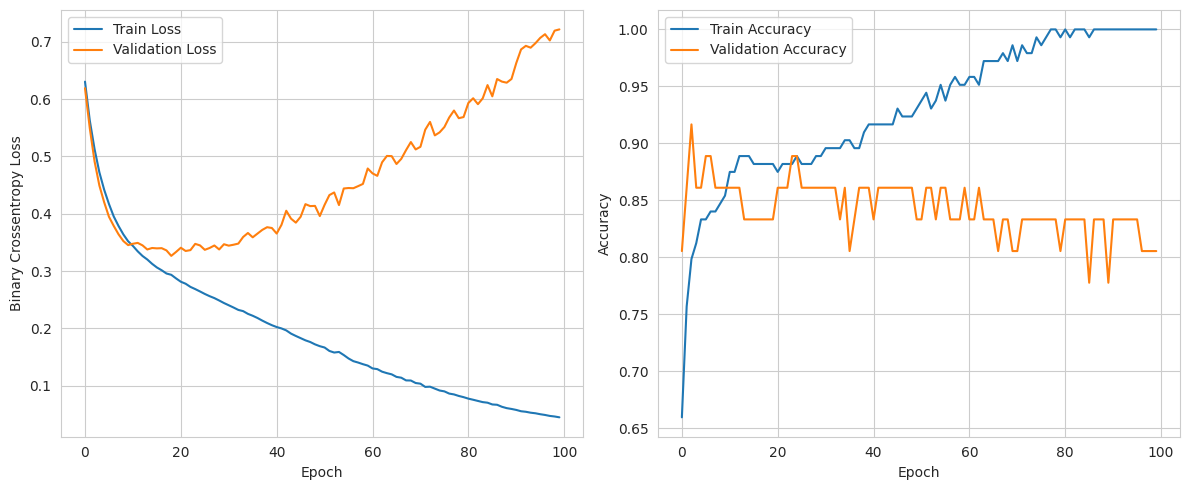

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7746 - loss: 1.0870
64 nodes, dropout 0, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


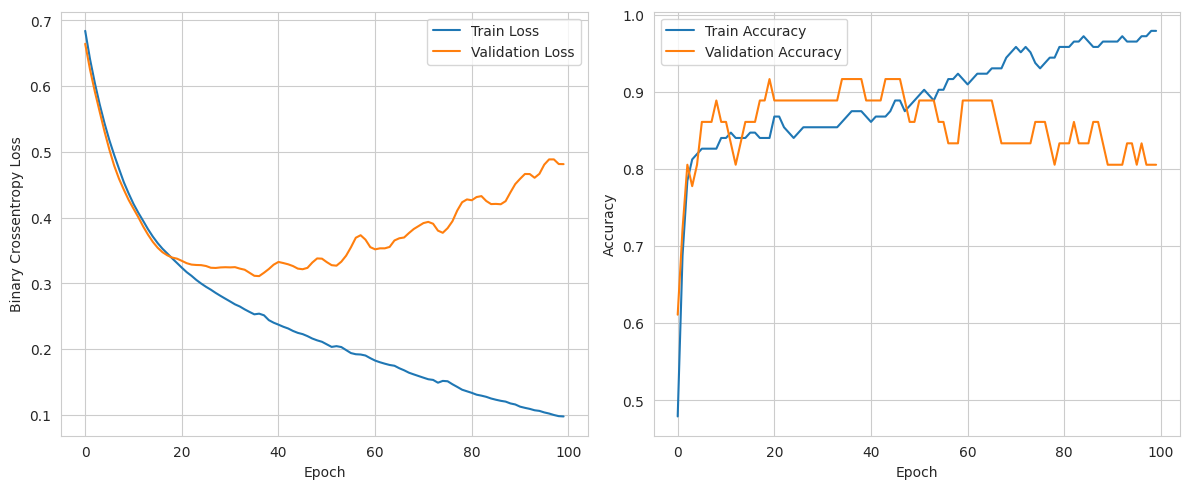

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7532 - loss: 0.9801
64 nodes, dropout 0, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


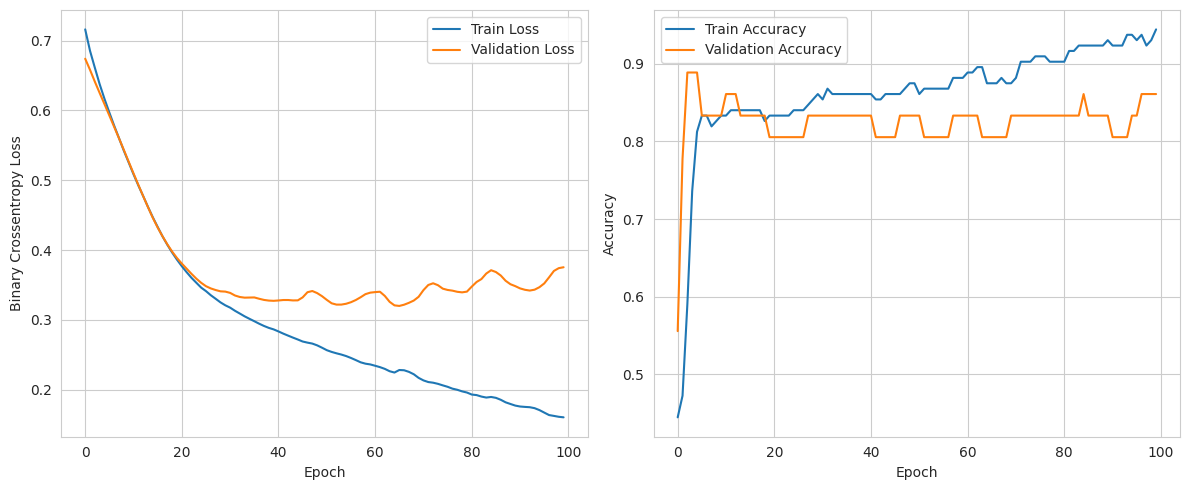

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7637 - loss: 0.6656
64 nodes, dropout 0.2, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


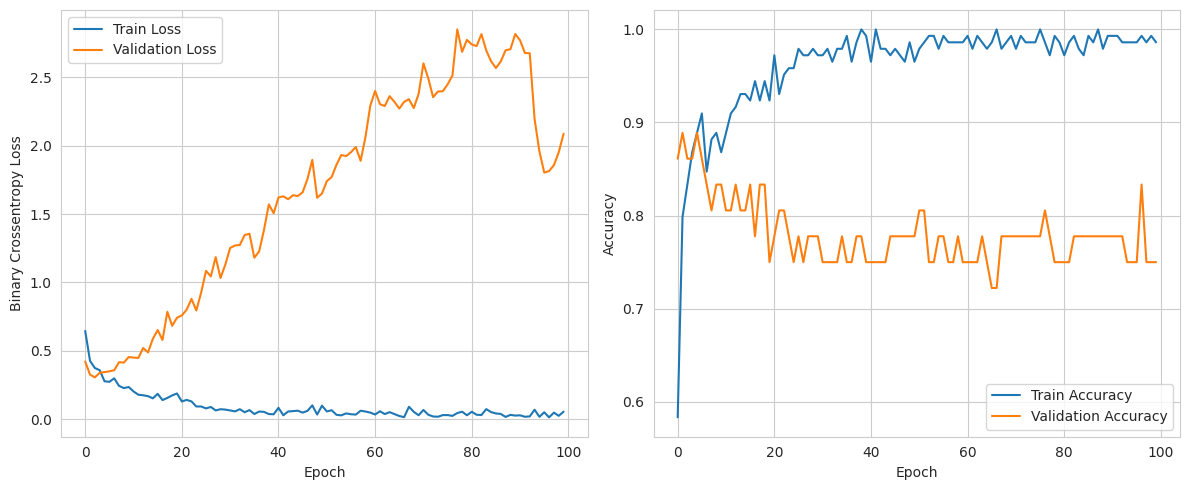

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7423 - loss: 3.4643
64 nodes, dropout 0.2, lr 0.01, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


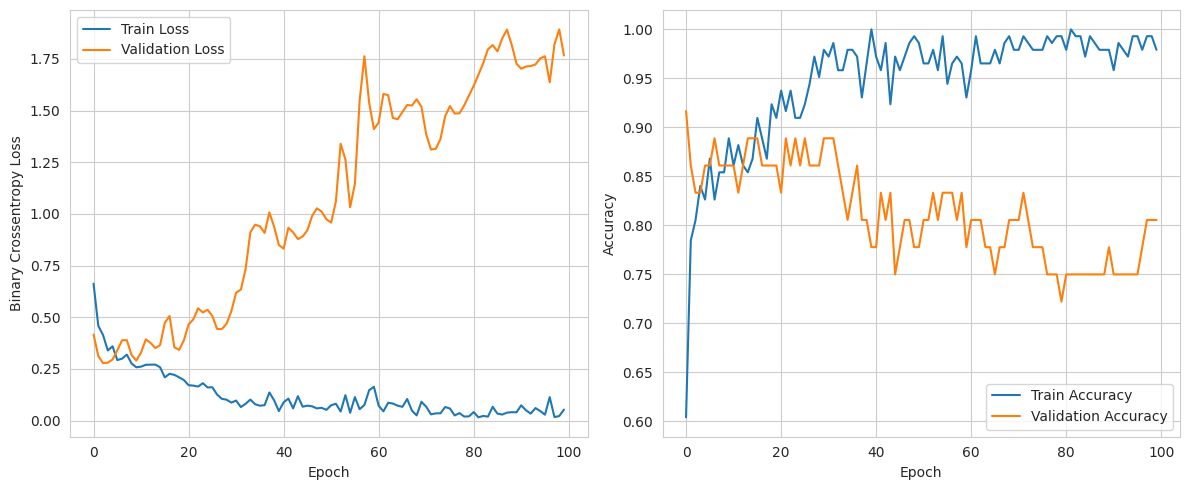

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7959 - loss: 3.7153
64 nodes, dropout 0.2, lr 0.01, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


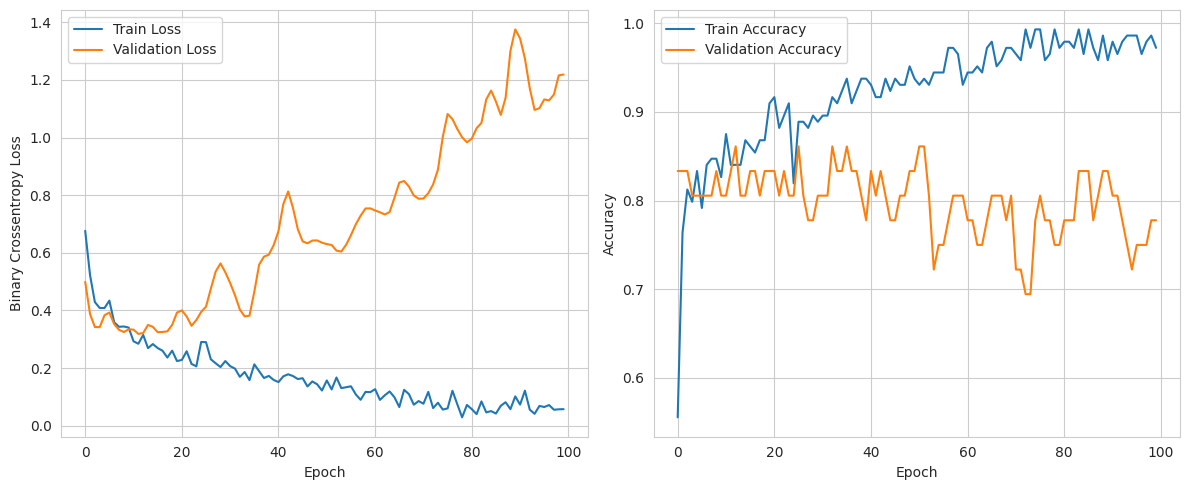

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7428 - loss: 2.1092
64 nodes, dropout 0.2, lr 0.005, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


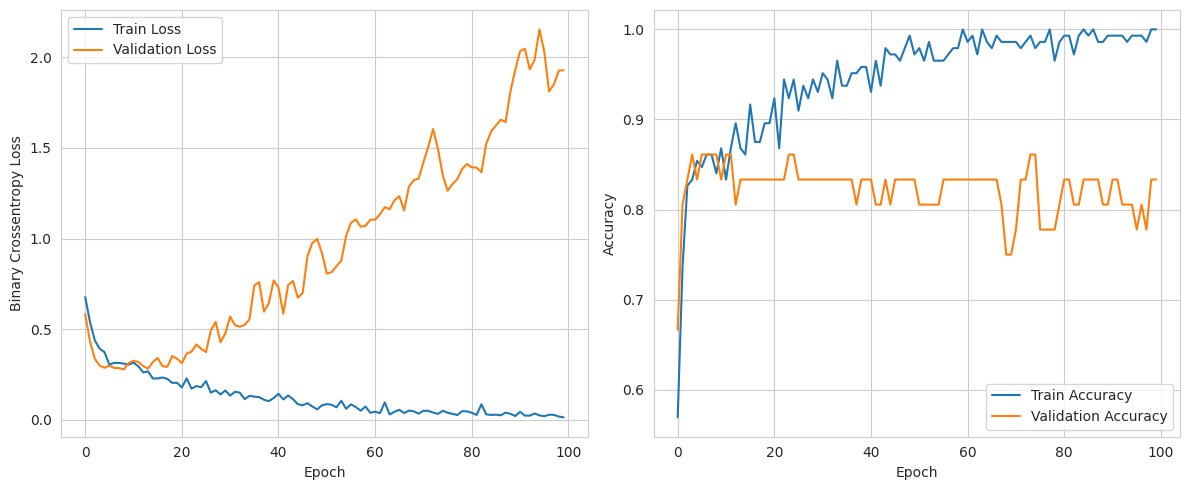

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7746 - loss: 3.2690
64 nodes, dropout 0.2, lr 0.005, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


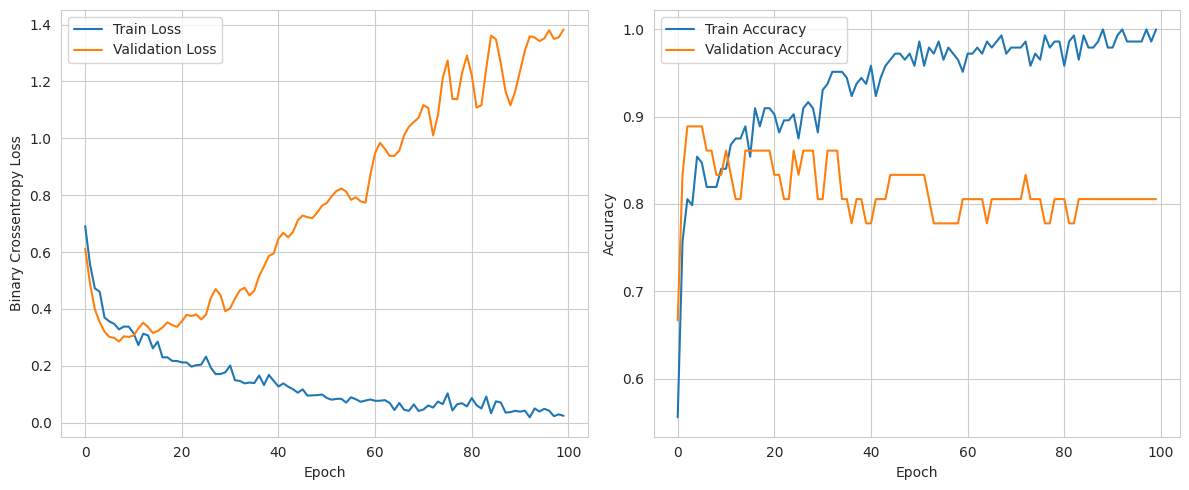

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6996 - loss: 2.6719
64 nodes, dropout 0.2, lr 0.005, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


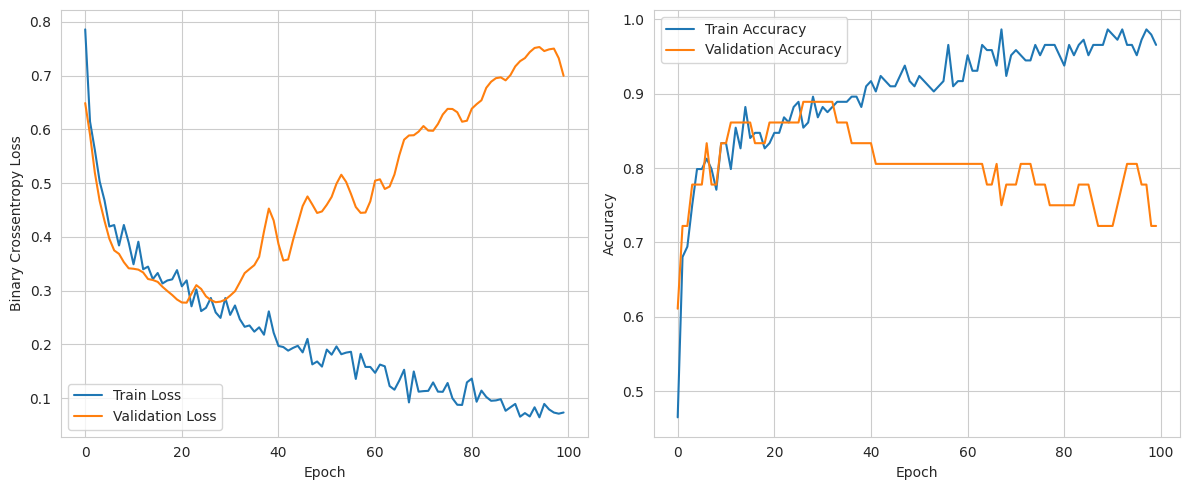

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7319 - loss: 1.9099
64 nodes, dropout 0.2, lr 0.001, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


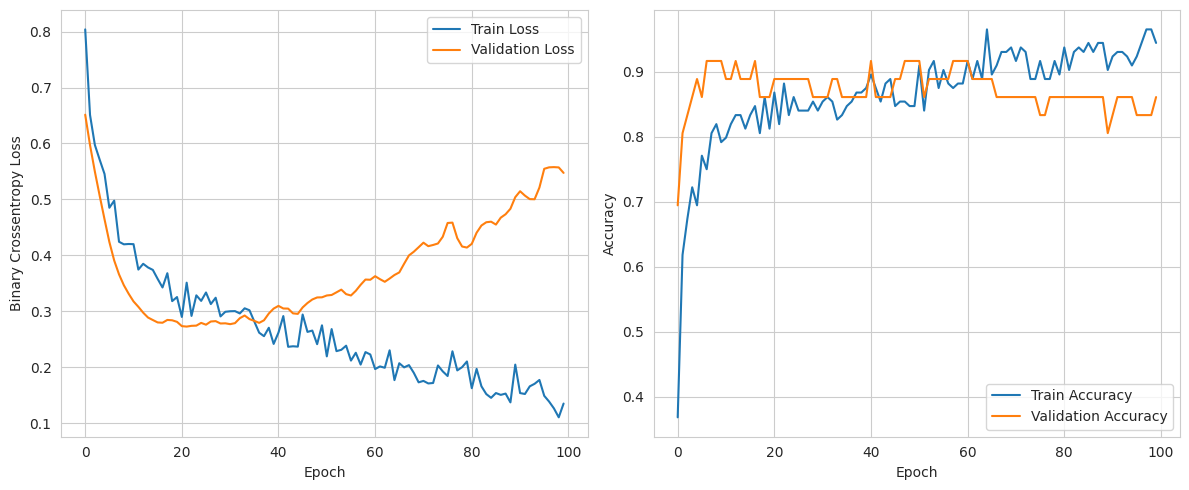

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7850 - loss: 0.8851
64 nodes, dropout 0.2, lr 0.001, batch size 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


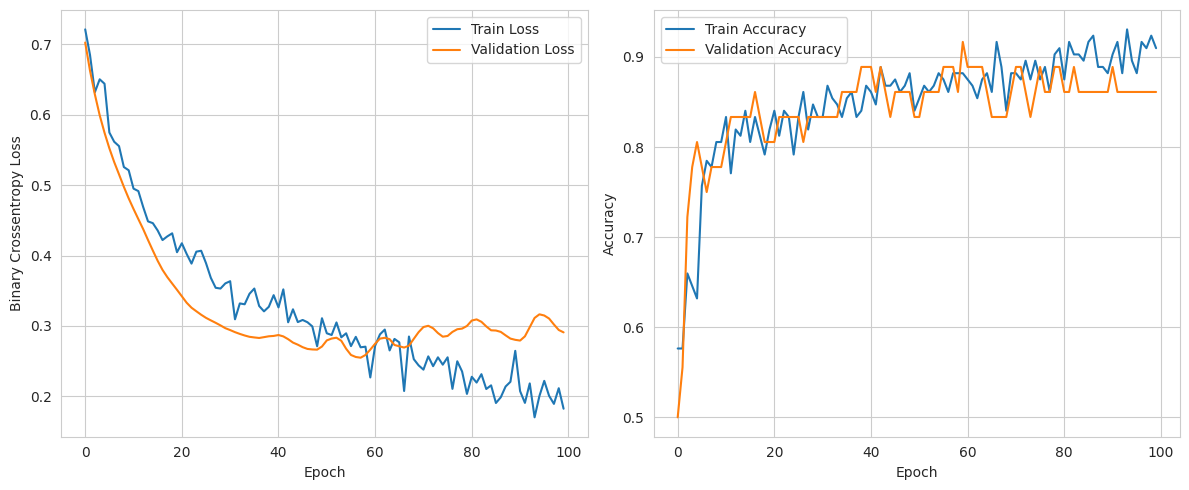

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7954 - loss: 0.6532
64 nodes, dropout 0.2, lr 0.001, batch size 128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


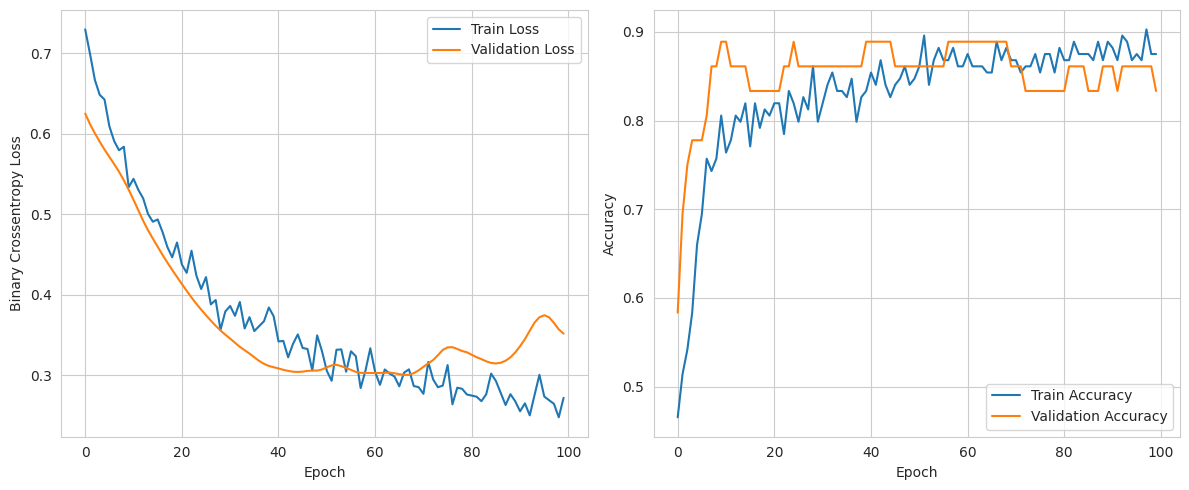

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7637 - loss: 0.5886


In [16]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                
                val_loss = model.evaluate(X_val, y_val)[0]
                
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

Predictions on best performing model

In [17]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Neural Network with Pytorch

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import itertools

class NeuralNet(nn.Module):
    def __init__(self, input_size, num_nodes, dropout_prob):
        super().__init__()
        #Defining the neural network
        self.model = nn.Sequential(
            nn.Linear(input_size, num_nodes),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(num_nodes, num_nodes),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(num_nodes, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [36]:
def train_nn_model_pt(X_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size):
    device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
    #X_train.shape[1] = the amount of columns (13)
    model = NeuralNet(X_train.shape[1], num_nodes, dropout_prob).to(device)
    #Defining loss = binary_crossentropy
    criterion = nn.BCELoss()
    #Defining optimizer = Adam(lr)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    
    #Dataset -> torch tensors
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32), 
        torch.tensor(y_train.values, dtype=torch.float32)
    )

    val_dataset = torch.utils.data.TensorDataset(
        torch.tensor(X_val.values, dtype=torch.float32),
        torch.tensor(y_val.values, dtype=torch.float32)
    )
    
    #Setting loader to load the data as batches of given batch_size
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


    history = {
        'loss': [],
        'val_loss': [],
        'accuracy': [],
        'val_accuracy': []
    }

    for epoch in range(epochs):
        #TRAIN
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

        history['loss'].append(running_loss / len(train_dataloader))
        history['accuracy'].append(correct / total)

        #VALIDATION
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():  # No gradients needed for validation
            for inputs, labels in val_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                predictions = (outputs > 0.5).float()
                val_correct += (predictions == labels).sum().item()
                val_total += labels.size(0)

        history['val_loss'].append(val_loss / len(val_dataloader))
        history['val_accuracy'].append(val_correct / val_total)

    return model, history

In [37]:
def plot_history_pt(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history['loss'], label='loss')
    ax1.plot(history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary cross-entropy')
    ax1.grid(True)
    ax1.legend()

    ax2.plot(history['accuracy'], label='accuracy')
    ax2.plot(history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend()

    plt.show()

num_nodes 16, dropout 0.0, lr 0.01, batch size 32


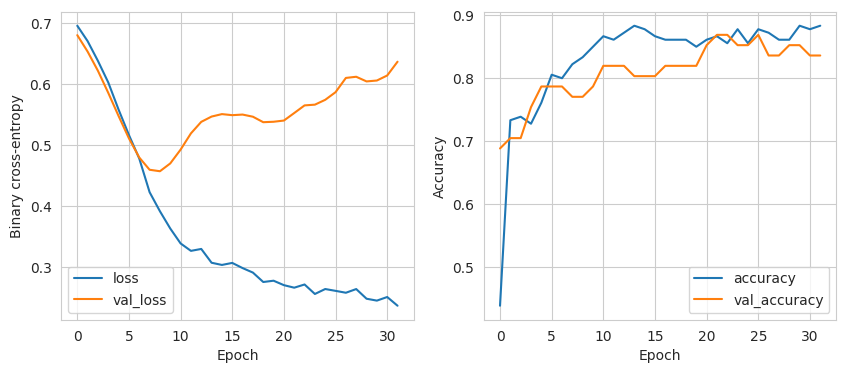

num_nodes 16, dropout 0.0, lr 0.01, batch size 64


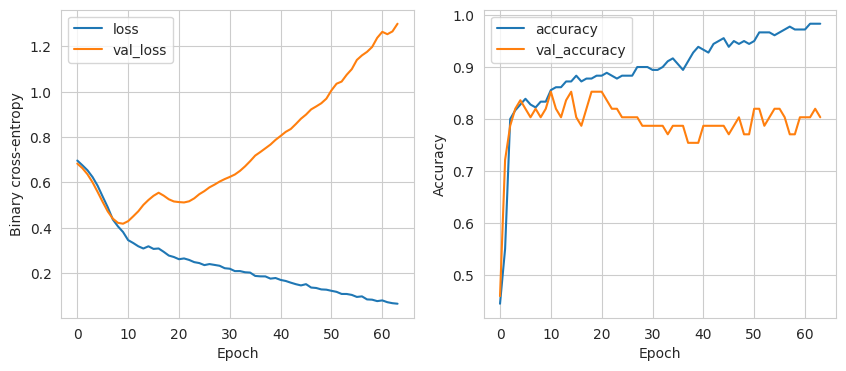

num_nodes 16, dropout 0.0, lr 0.01, batch size 128


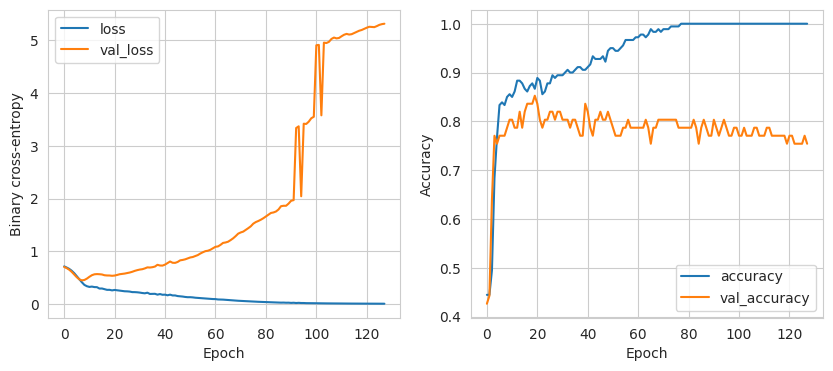

num_nodes 16, dropout 0.0, lr 0.005, batch size 32


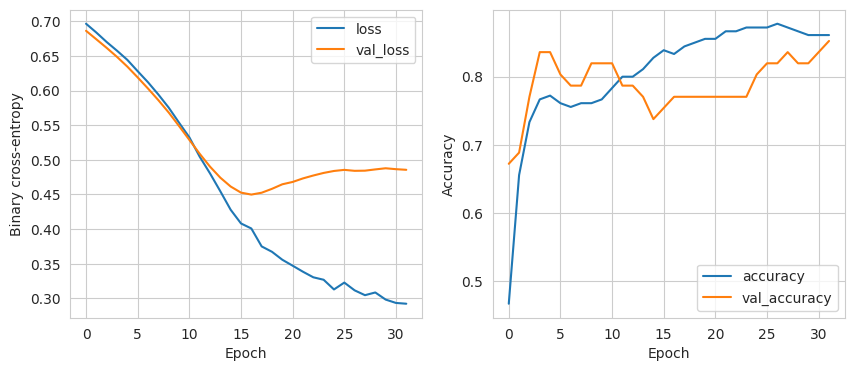

num_nodes 16, dropout 0.0, lr 0.005, batch size 64


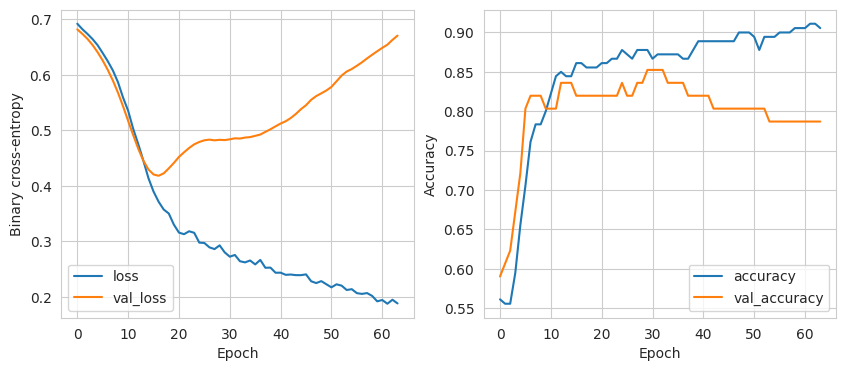

num_nodes 16, dropout 0.0, lr 0.005, batch size 128


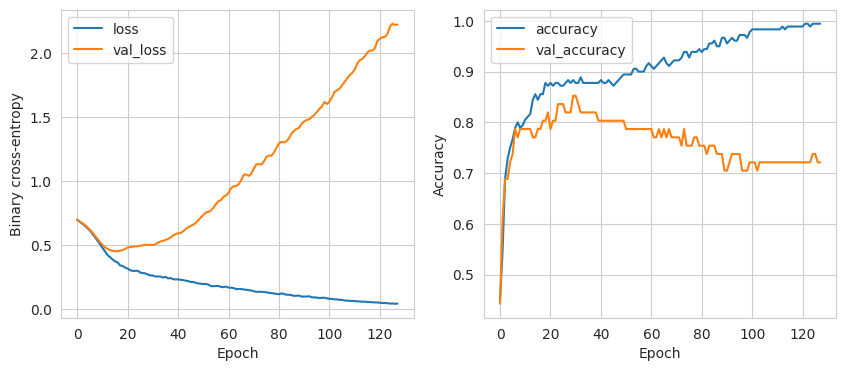

num_nodes 16, dropout 0.0, lr 0.001, batch size 32


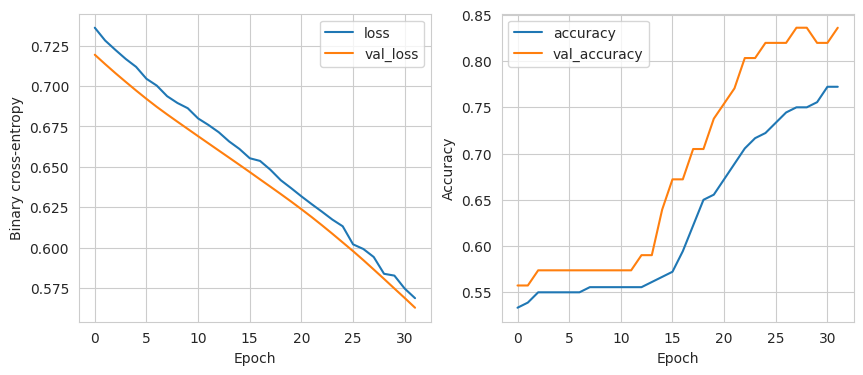

num_nodes 16, dropout 0.0, lr 0.001, batch size 64


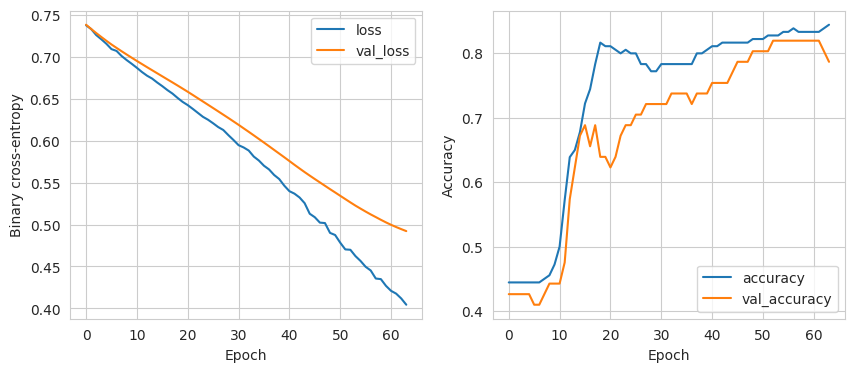

num_nodes 16, dropout 0.0, lr 0.001, batch size 128


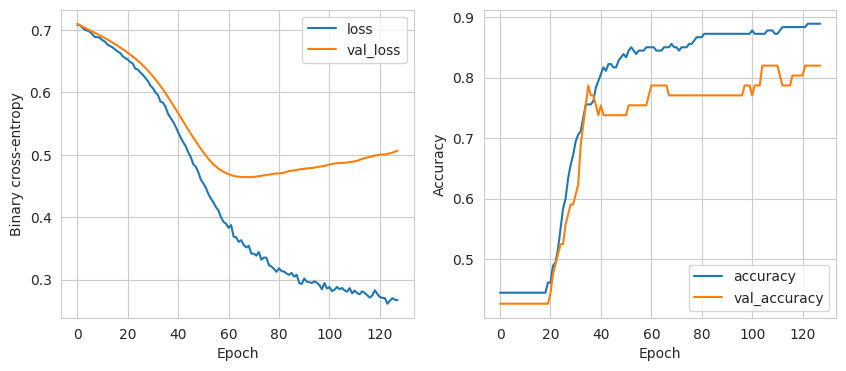

num_nodes 16, dropout 0.2, lr 0.01, batch size 32


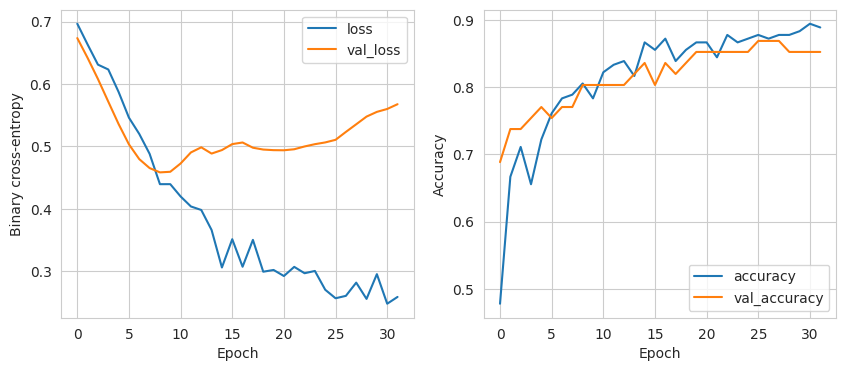

num_nodes 16, dropout 0.2, lr 0.01, batch size 64


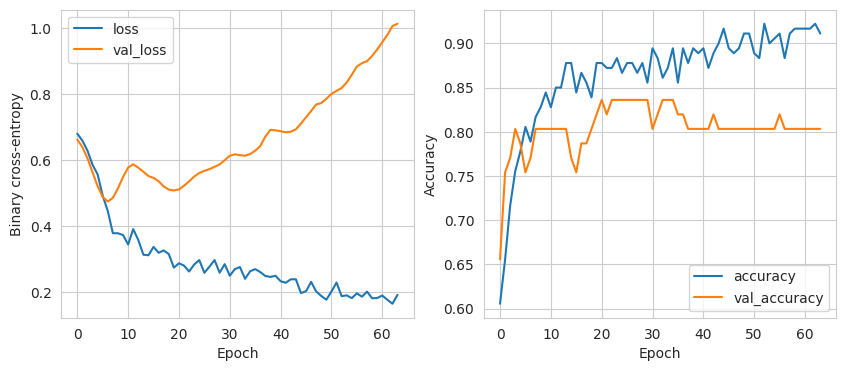

num_nodes 16, dropout 0.2, lr 0.01, batch size 128


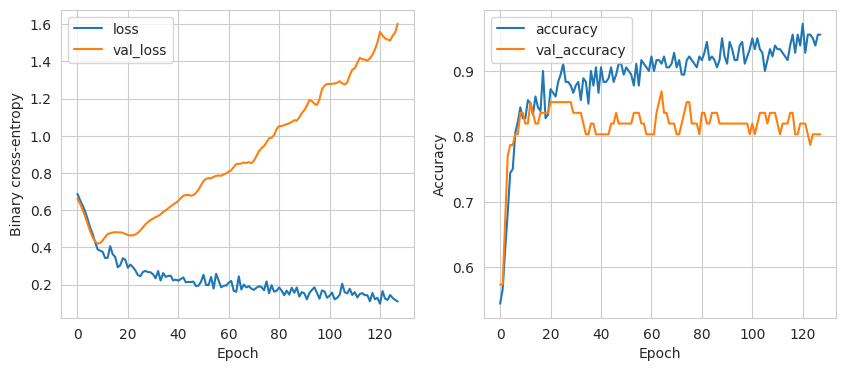

num_nodes 16, dropout 0.2, lr 0.005, batch size 32


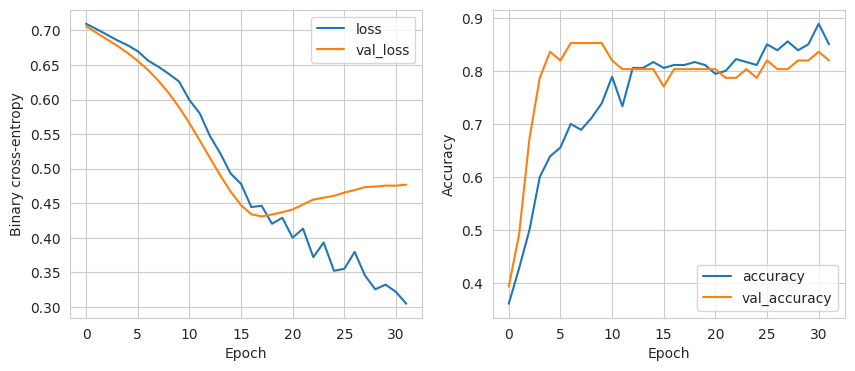

num_nodes 16, dropout 0.2, lr 0.005, batch size 64


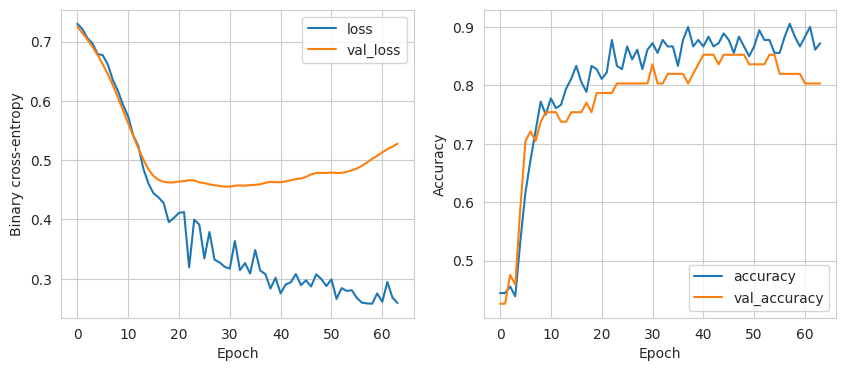

num_nodes 16, dropout 0.2, lr 0.005, batch size 128


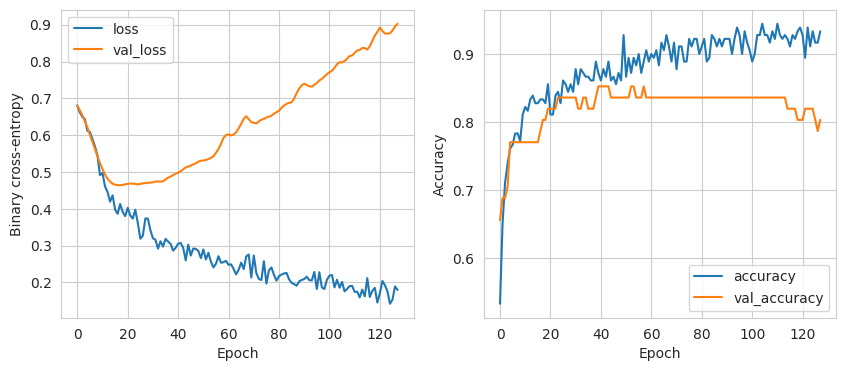

num_nodes 16, dropout 0.2, lr 0.001, batch size 32


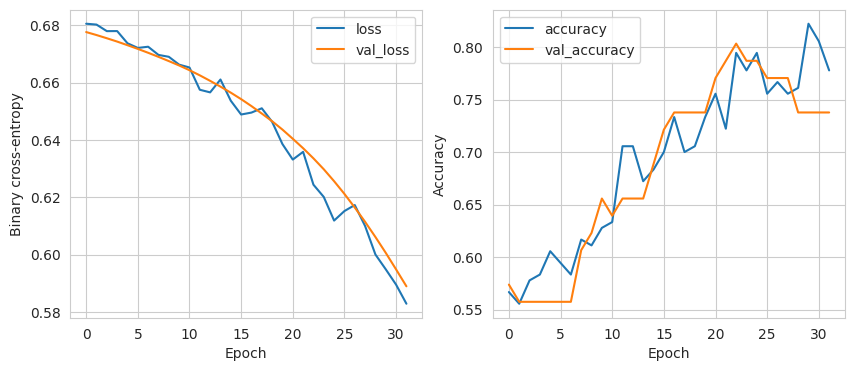

num_nodes 16, dropout 0.2, lr 0.001, batch size 64


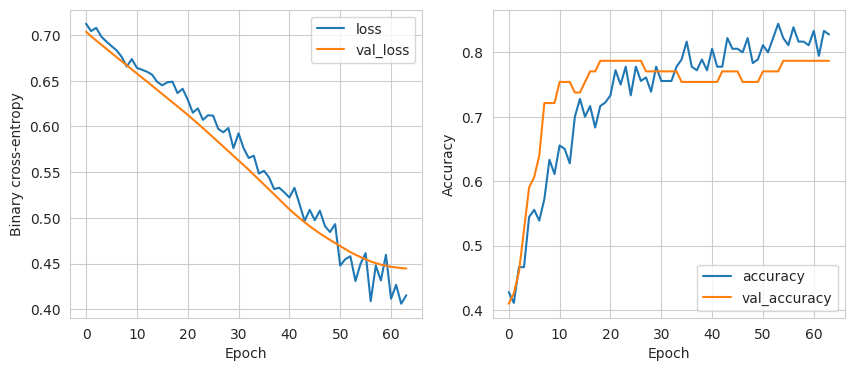

num_nodes 16, dropout 0.2, lr 0.001, batch size 128


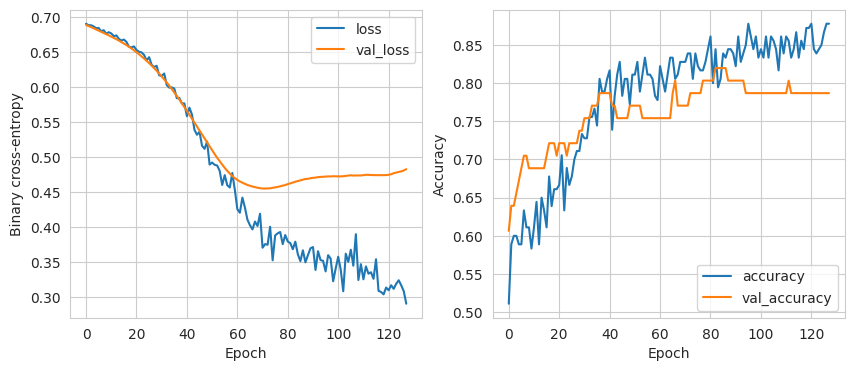

num_nodes 32, dropout 0.0, lr 0.01, batch size 32


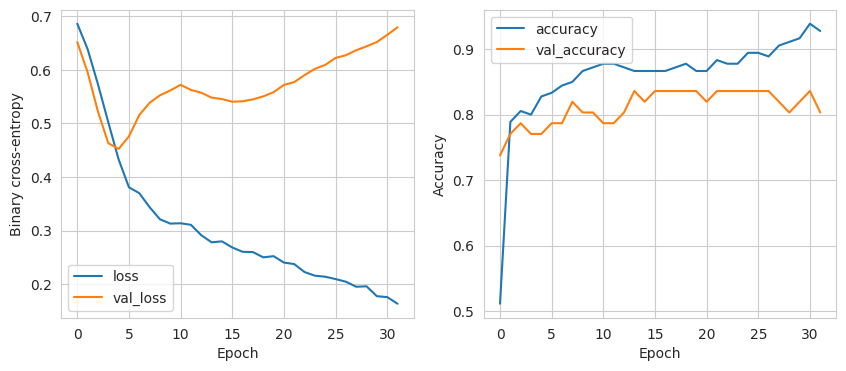

num_nodes 32, dropout 0.0, lr 0.01, batch size 64


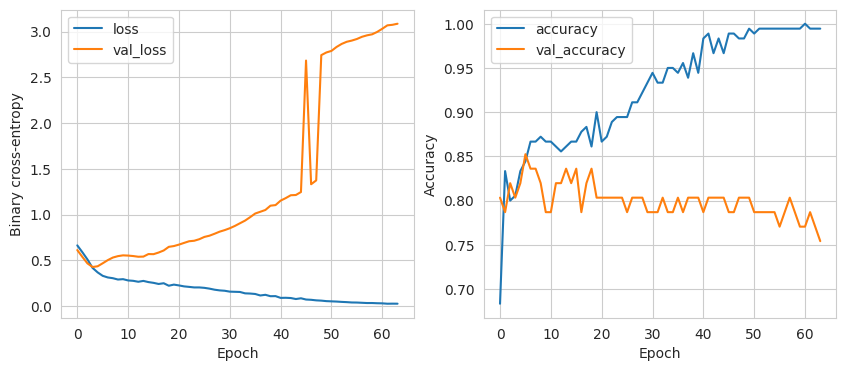

num_nodes 32, dropout 0.0, lr 0.01, batch size 128


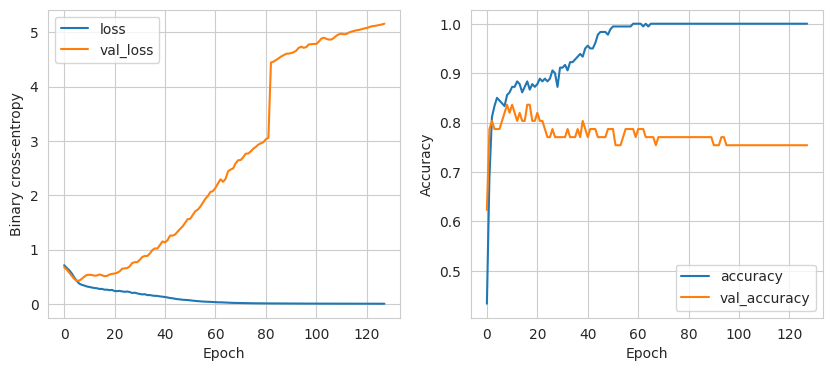

num_nodes 32, dropout 0.0, lr 0.005, batch size 32


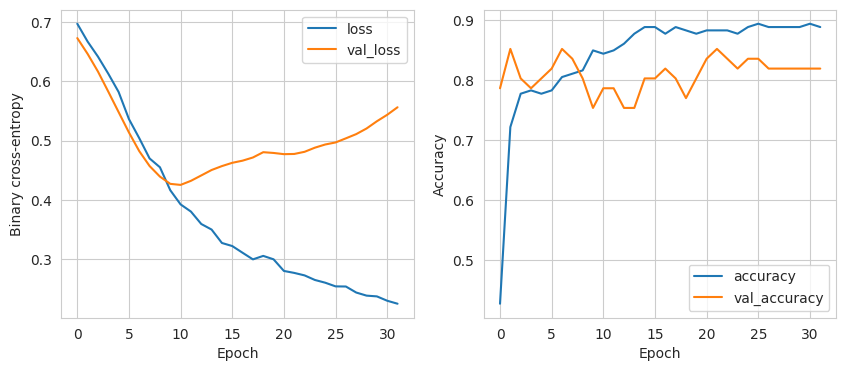

num_nodes 32, dropout 0.0, lr 0.005, batch size 64


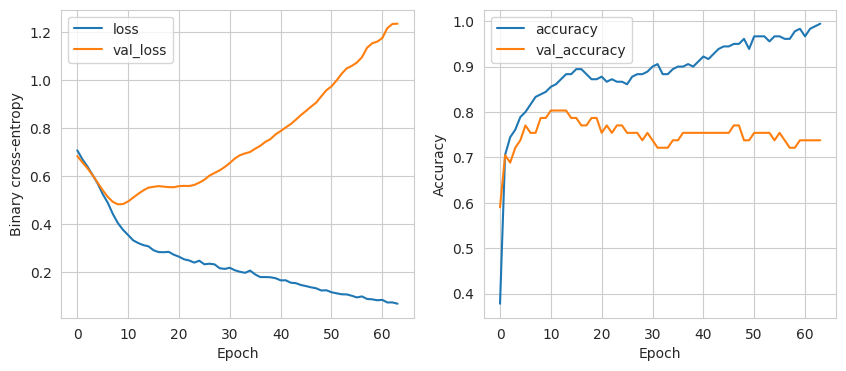

num_nodes 32, dropout 0.0, lr 0.005, batch size 128


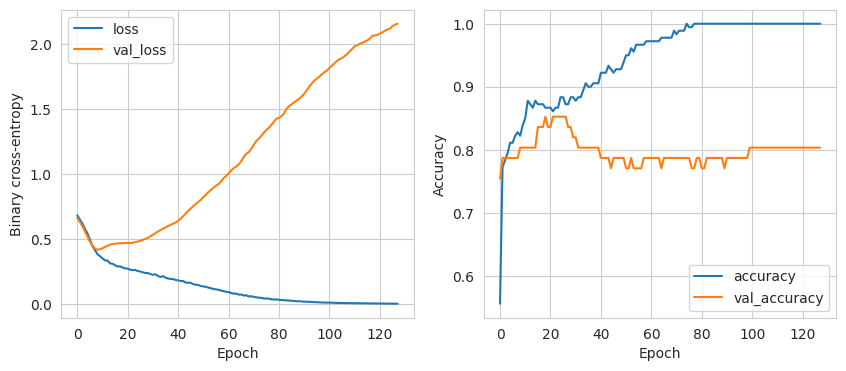

num_nodes 32, dropout 0.0, lr 0.001, batch size 32


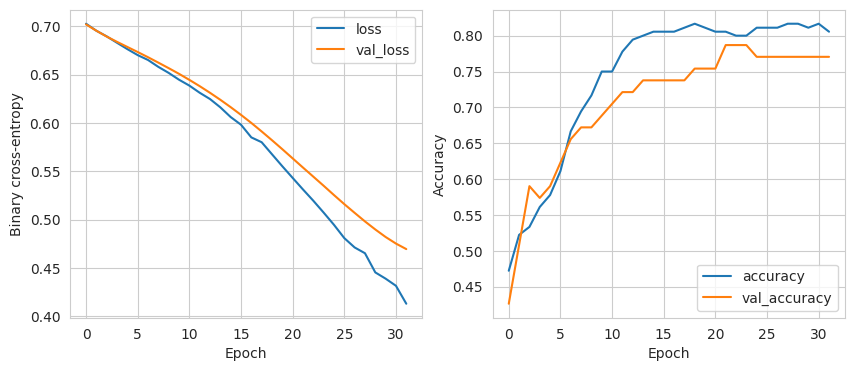

num_nodes 32, dropout 0.0, lr 0.001, batch size 64


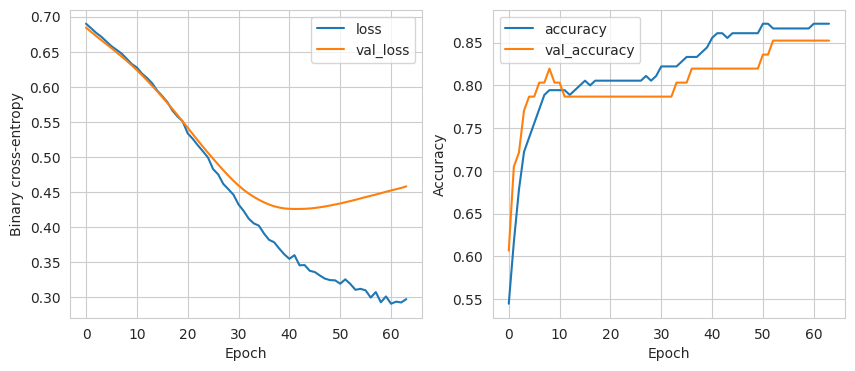

num_nodes 32, dropout 0.0, lr 0.001, batch size 128


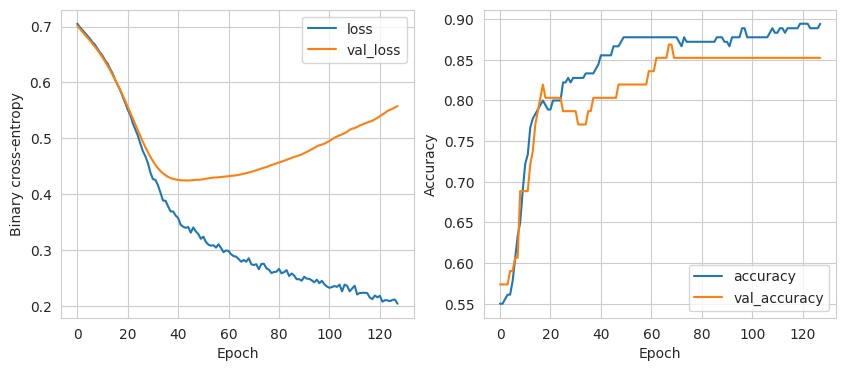

num_nodes 32, dropout 0.2, lr 0.01, batch size 32


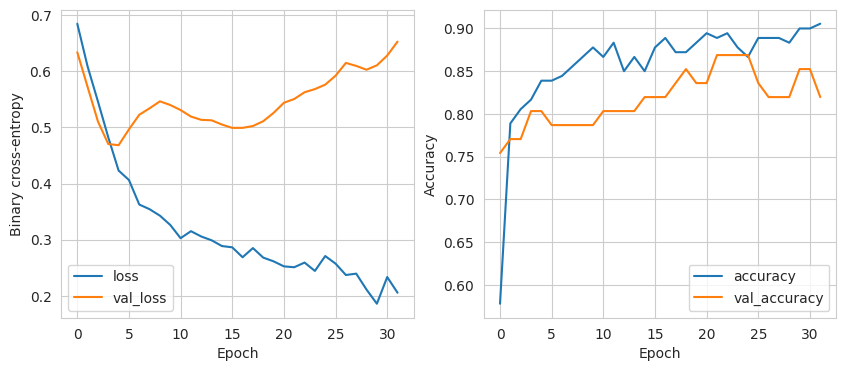

num_nodes 32, dropout 0.2, lr 0.01, batch size 64


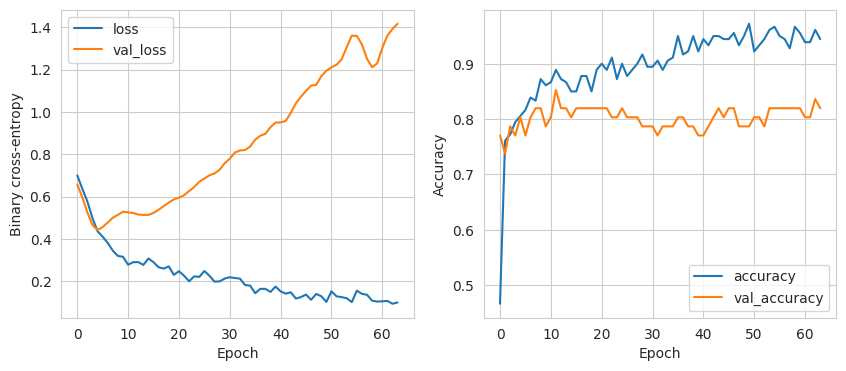

num_nodes 32, dropout 0.2, lr 0.01, batch size 128


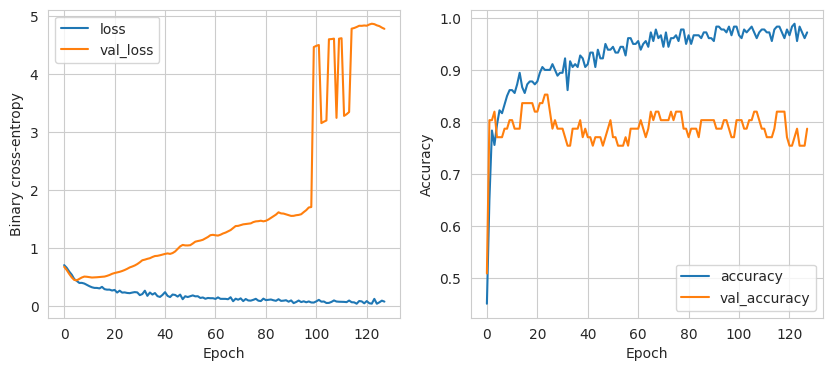

num_nodes 32, dropout 0.2, lr 0.005, batch size 32


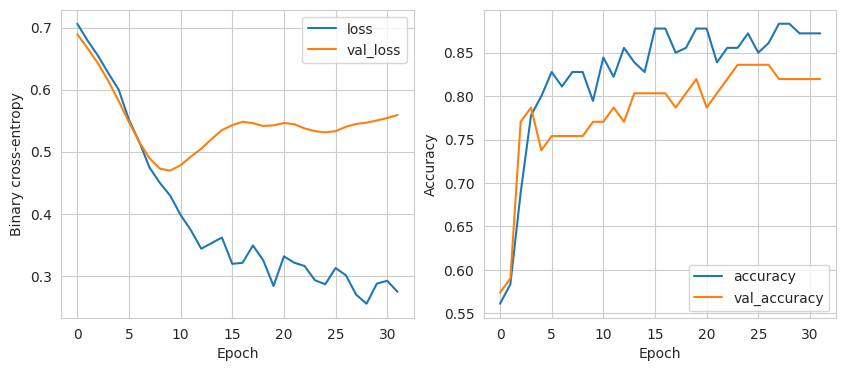

num_nodes 32, dropout 0.2, lr 0.005, batch size 64


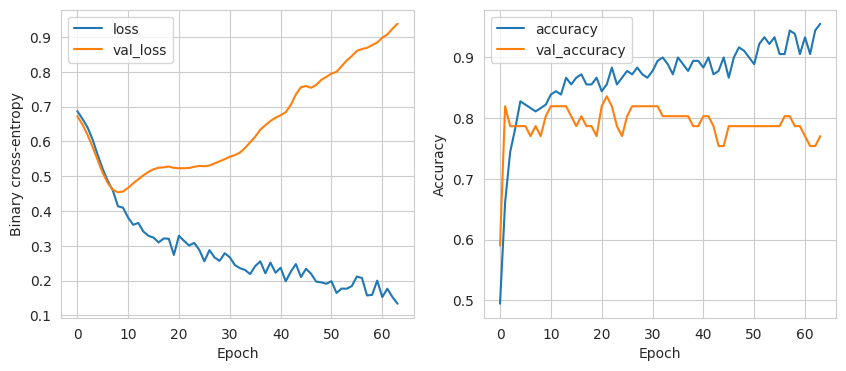

num_nodes 32, dropout 0.2, lr 0.005, batch size 128


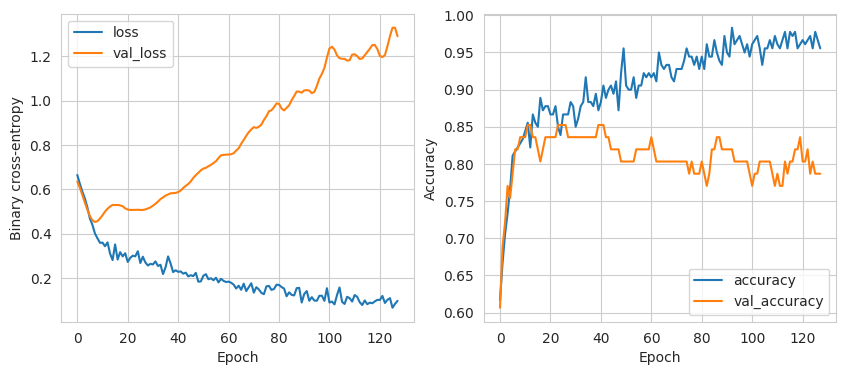

num_nodes 32, dropout 0.2, lr 0.001, batch size 32


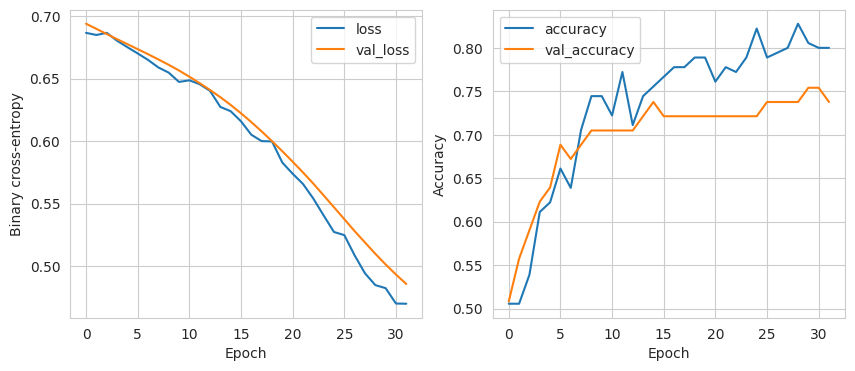

num_nodes 32, dropout 0.2, lr 0.001, batch size 64


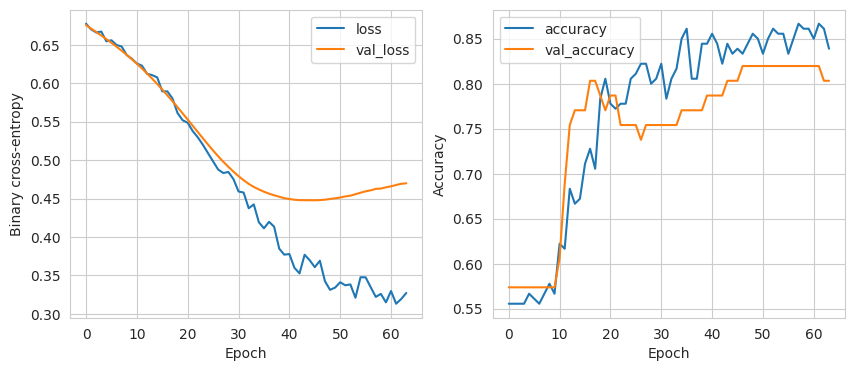

num_nodes 32, dropout 0.2, lr 0.001, batch size 128


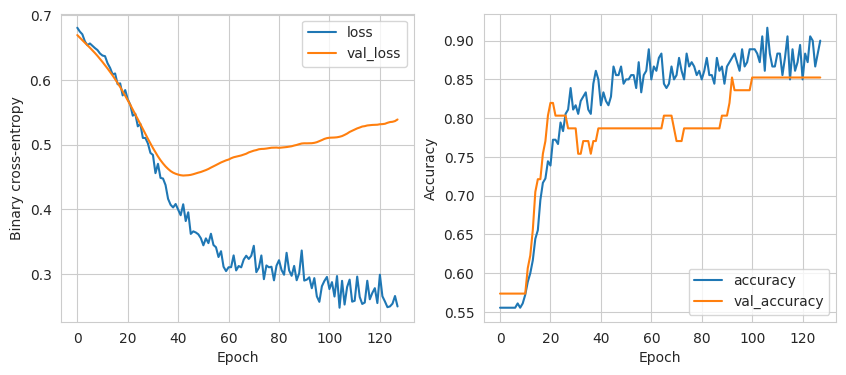

num_nodes 64, dropout 0.0, lr 0.01, batch size 32


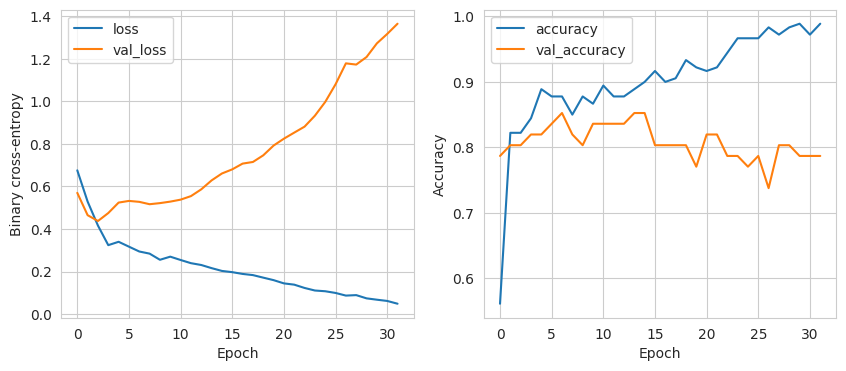

num_nodes 64, dropout 0.0, lr 0.01, batch size 64


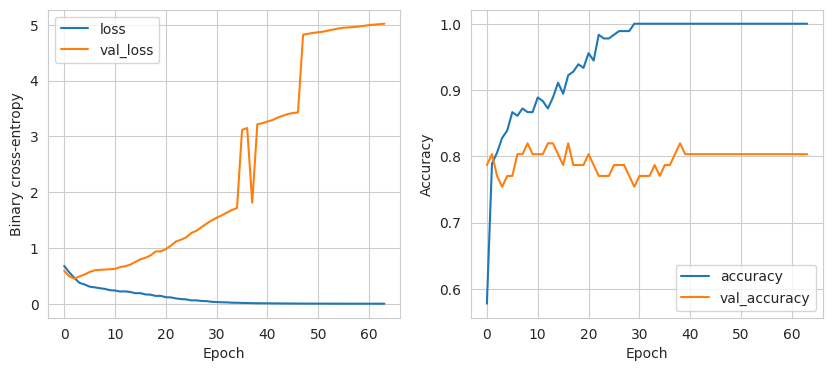

num_nodes 64, dropout 0.0, lr 0.01, batch size 128


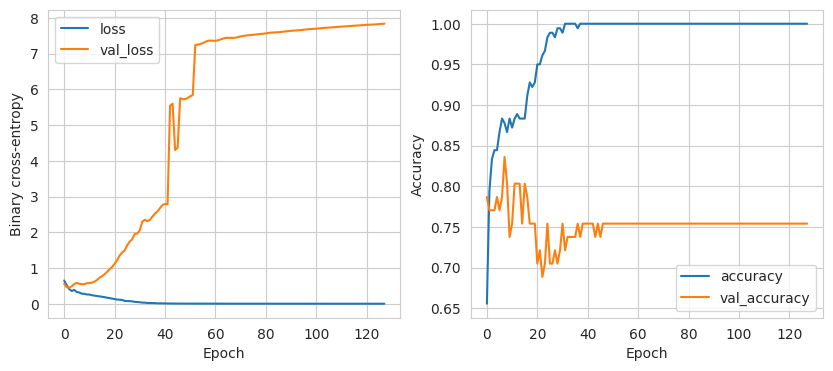

num_nodes 64, dropout 0.0, lr 0.005, batch size 32


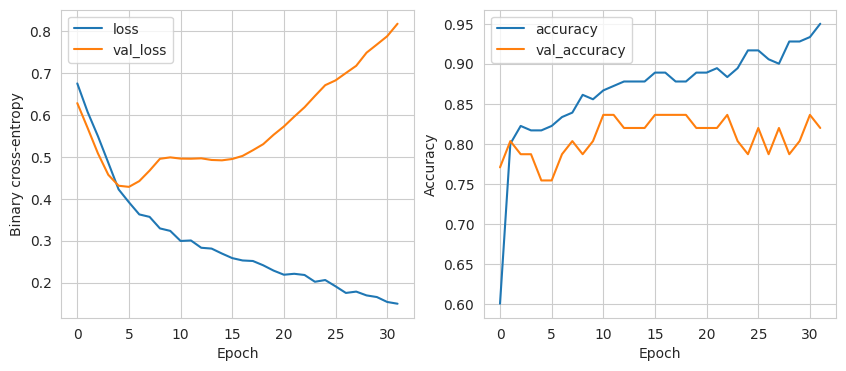

num_nodes 64, dropout 0.0, lr 0.005, batch size 64


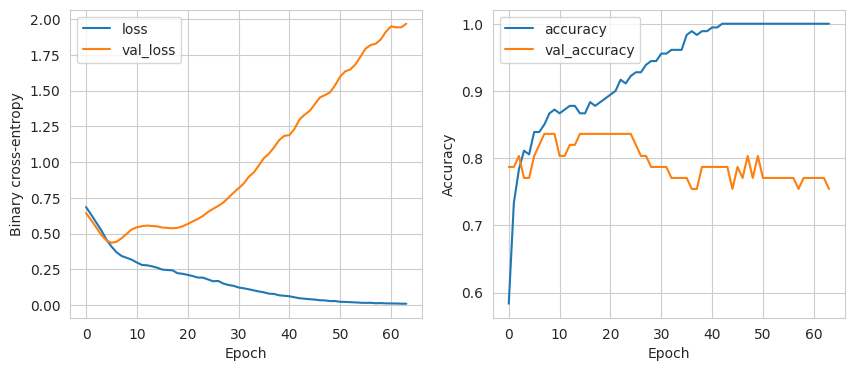

num_nodes 64, dropout 0.0, lr 0.005, batch size 128


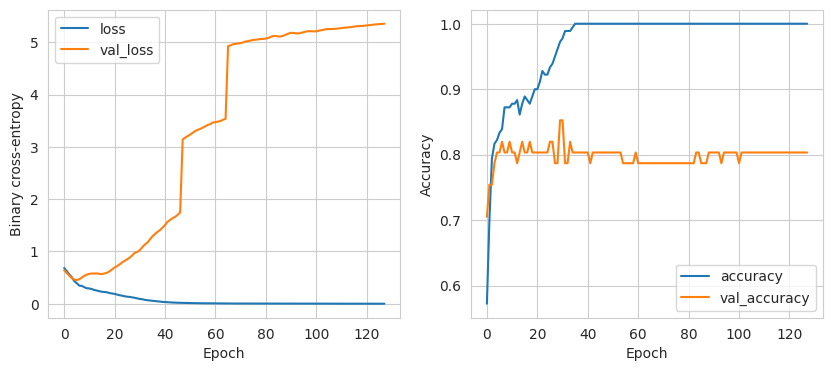

num_nodes 64, dropout 0.0, lr 0.001, batch size 32


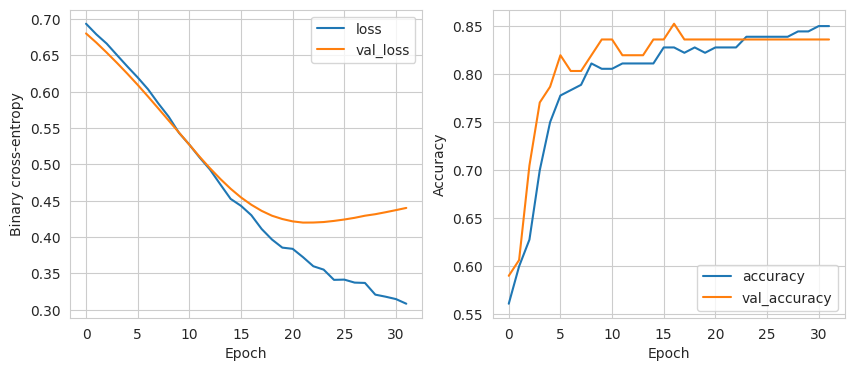

num_nodes 64, dropout 0.0, lr 0.001, batch size 64


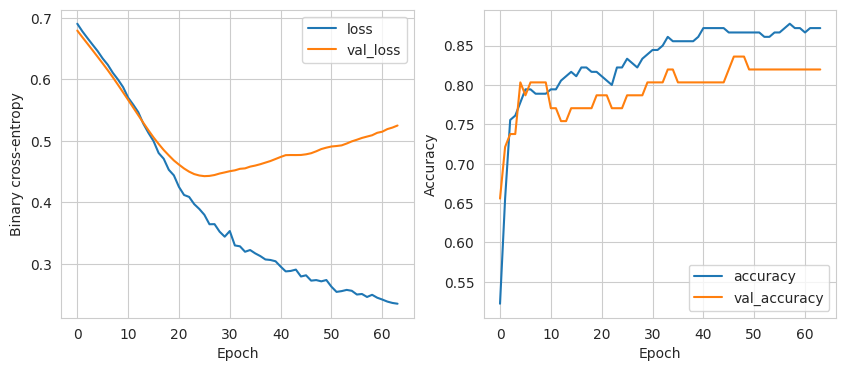

num_nodes 64, dropout 0.0, lr 0.001, batch size 128


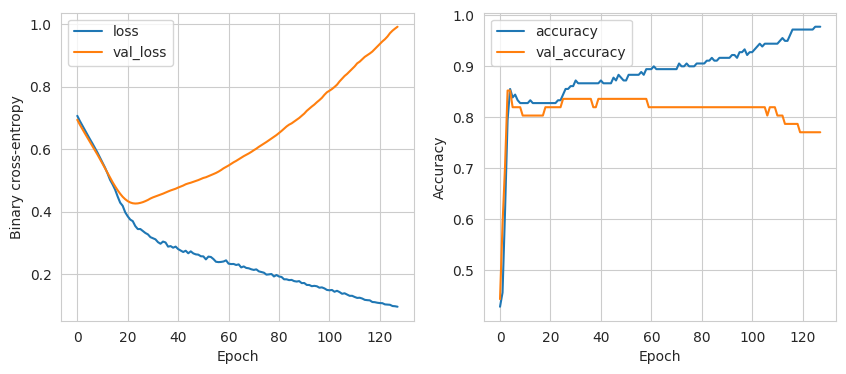

num_nodes 64, dropout 0.2, lr 0.01, batch size 32


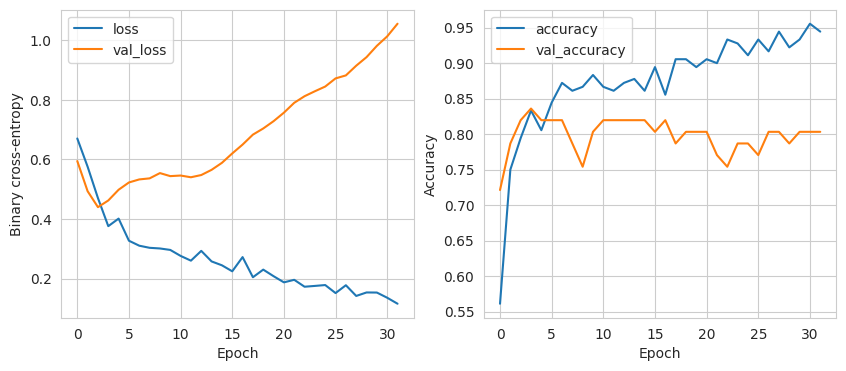

num_nodes 64, dropout 0.2, lr 0.01, batch size 64


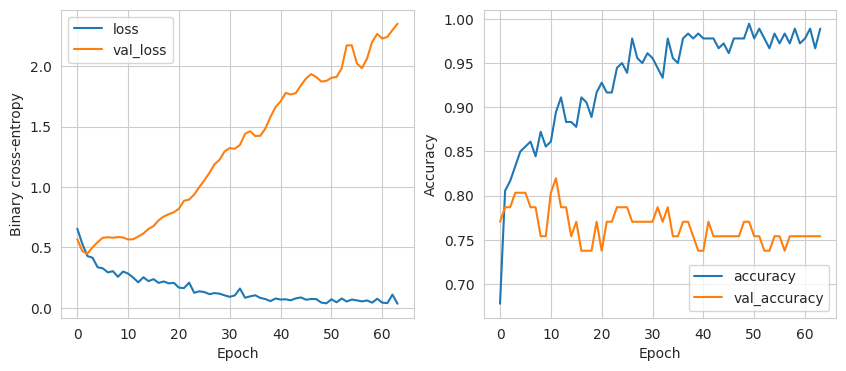

num_nodes 64, dropout 0.2, lr 0.01, batch size 128


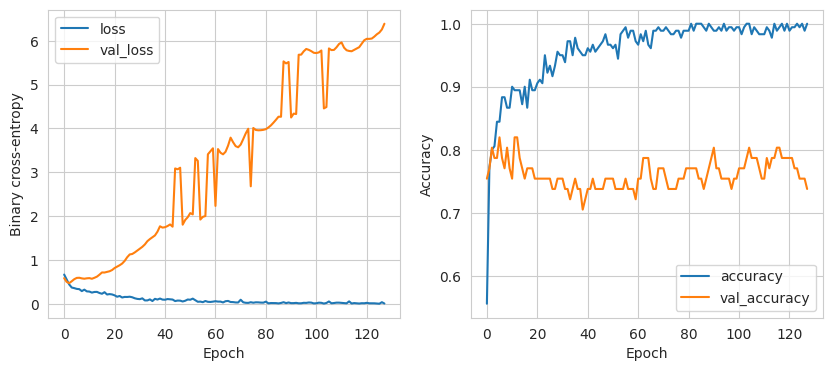

num_nodes 64, dropout 0.2, lr 0.005, batch size 32


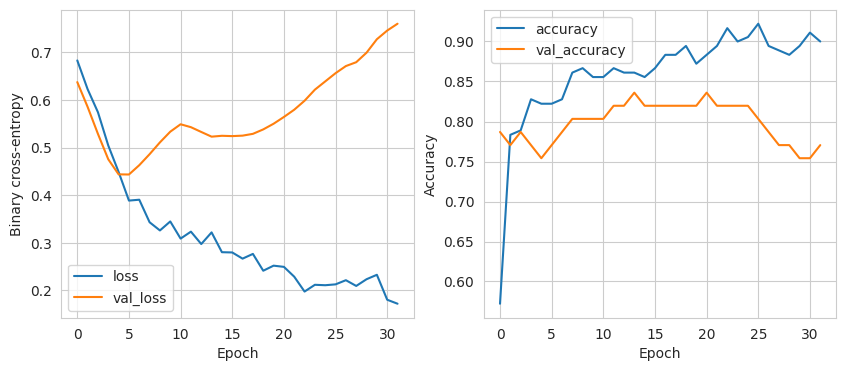

num_nodes 64, dropout 0.2, lr 0.005, batch size 64


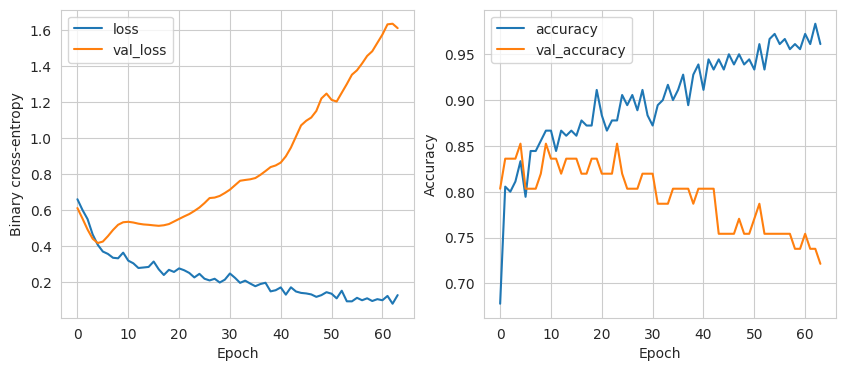

num_nodes 64, dropout 0.2, lr 0.005, batch size 128


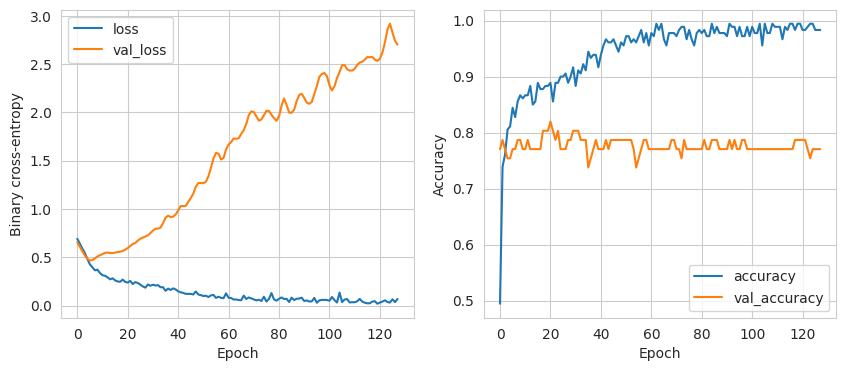

num_nodes 64, dropout 0.2, lr 0.001, batch size 32


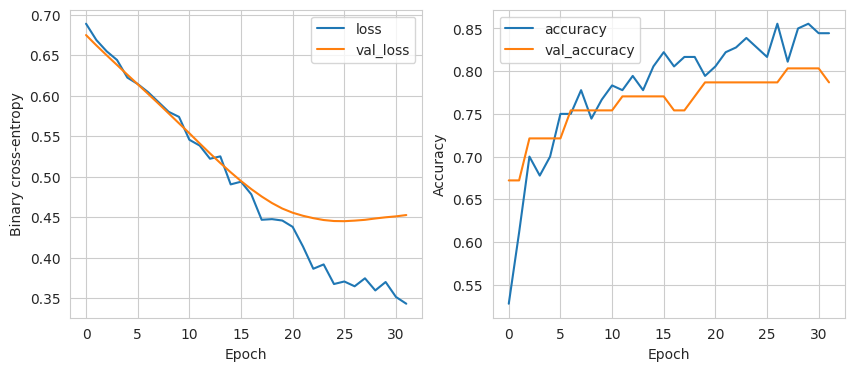

num_nodes 64, dropout 0.2, lr 0.001, batch size 64


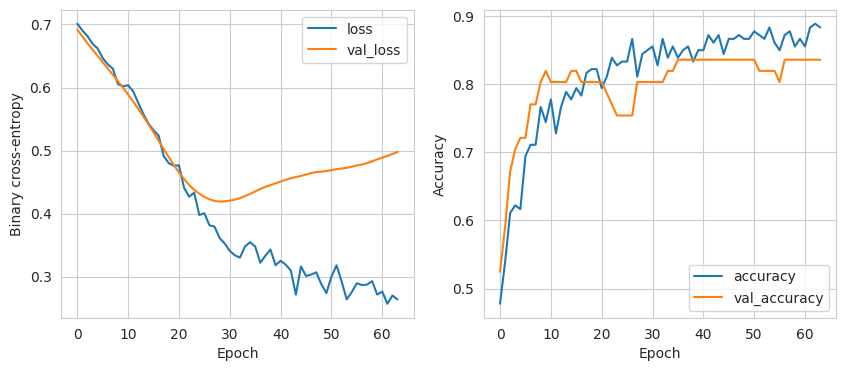

num_nodes 64, dropout 0.2, lr 0.001, batch size 128


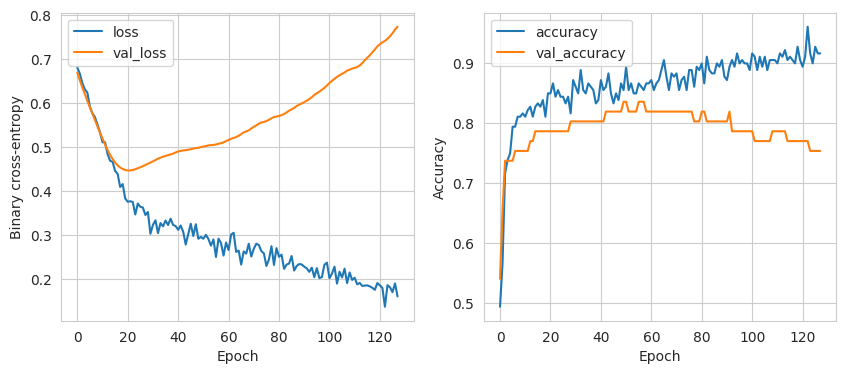

In [38]:
least_val_loss_pt = float('inf')
least_loss_model_pt = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"num_nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_nn_model_pt(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history_pt(history)
                val_loss = history['val_loss'][-1]
                if val_loss < least_val_loss:
                    least_val_loss_pt = val_loss
                    least_loss_model_pt = model

In [39]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

